# DSC \#20: Xanda Rescues the Topic Model Disaster

by Sathvika Anand, Quinn Dombrowski, and Xanda Schofield

November 30, 2023

<div style='float: right; width: 200px;margin-left: 7px;margin-top: 0px;'>
<img src='_static/images/bookcovers/dsc20_cover.jpg' alt='DSC 19 book cover' />
</div>

## Quinn

In the beginning, there was topic modeling.

No, really.

When I was [in Las Vegas, having a few drinks](https://datasittersclub.github.io/site/dsc1.html), playing with the beginnings of what would become the Data-Sitters Club, one of the very first things I tried was topic modeling. At least for DH people of my generation, topic modeling is the kind of thing that you look towards as one of the first analytic steps for a corpus  (whether or not you really understand what's going on with it, let's be honest). And, I gotta say, I was underwhelmed with what I got as a first topic model using some fairly-standard default settings. [^1]: Yes, I'd read "[The LDA Buffet](https://www.matthewjockers.net/macroanalysisbook/lda/)" by Matt Jockers -- who came up in [DSC 11: Katia and the Sentiment Snobs](https://datasittersclub.github.io/site/dsc11.html). It's apt for Las Vegas given the prevalence of buffets, but honestly, it left me more hungry than satisfied with my understanding of topic modeling.

The Data-Sitters Club has written 19 books since then – 24 books if you count the Multilingual Mysteries – and we haven’t touched topic modeling. But it’s time we change that. Some early social media posts about this book left me thinking that I wasn't alone in feeling a little insecure of my understanding about what topic models are and what they do, and how you can work with them to make them as helpful as possible.

Luckily, I knew an expert. Xanda Schofield has straight blue hair except for her dark brown roots, with blue glasses frames to match her blue eyes. She's a professor of computer science at Harvey Mudd College, where she focuses her research on how to make computational text analysis processes actually work for questions in the humanities and social sciences. Since Harvey Mudd is a little outside of Los Angeles, she's almost always wearing sandals, even when she's wearing her preferred work clothes of fancy slacks or floral dresses. She likes video games, Dungeons and Dragons, and baking cookies, and is obsessive about completing the New York Times crossword every day (and has done so for about 1000 days straight now). It turns out she was a DSC fangirl even before we started swapping some messages on Twitter (RIP) about art, text analysis, and beyond. More than anything, Xanda loves talking to people who know a lot about a collection of text, whether it's boring financial reports, social media posts, or a collection of novels about the life and times of a babysitting club in Stoneybrook, Connecticut. Also, her PhD advisor was David Mimno – the very same David Mimno who maintains Mallet, the most widely-known topic modeling tool, which has also been implemented in other tools like Voyant.

Xanda was also able to recruit a Harvey Mudd student to help with the quest to revisit topic models. Sathvika Anand has thick, curly maroon hair, and dark brown eyes sometimes behind round glasses when she doesn't feel like putting her contacts in. She's a senior at Harvey Mudd College majoring in Computer Science, but her linguistics concentration sparked an interest in the field of natural language processing. Though she might have been a tad too young to delve into the original The Baby-Sitters Club books, Sathvika's appetite for reading was insatiable throughout the mid 2000s. In her free time, she really enjoys scaling walls at rock climbing gyms, cooking, and playing the guitar, even if it means relearning songs she once mastered years ago.

With their help, I was going to finally get to the bottom of topic modeling.


## Xanda

### How does topic modeling work?

In the very first chapter of BSC #1, Kristy's Great Idea, Kristy discovers a new word:

> "Mr. Redmont," I said, "I'm really sorry. I didn't mean anything. I mean, I didn't mean I was glad school was over. I meant I was glad I could go home. Because my house is air-conditioned...."
>
> Mr. Redmont nodded. "But do you think, Kristy, that it would be possible, in the future, for you to conduct yourself with a bit more decorum?"
>
> I wasn't sure of the exact meaning of decorum, but I had a pretty good idea it meant not spoiling Mr. Redmont's day by jumping up and shouting hooray when the bell rang.

How does Kristy narrow down the meaning of "decorum"? The answer is context: Kristy knows she just did something rude, and that Mr. Redmont's request has something to do with not being happy with her reaction to school ending. She can use the words in Mr. Redmont's statement, combined with the situation she's in, to figure out that "decorum" has to do with behavior.

Later, she gets a more full definition, since she's asked to write 100 words about decorum as a punishment:

> I looked up decorum in my dictionary. It said: "Conformity to social convention; propriety. See Synonyms at etiquette." I had to look up both propriety and etiquette before I got the picture. Then I understood. I'd been rude. Why hadn't Mr. Redmont just said so? It would have made things a lot simpler.

As readers, sometimes we acquire the meanings of words by looking things up, but as the types of things we read get more complicated and situationally specific, the more impractical it gets to look up every word we don't know. Instead, we often operate on context clues based on what words show up together. Once we know what "etiquette" means, when we see it in the vicinity of "decorum", it gives us a better sense that they might be related. This lands us in situations where we sort of know a word is about ("It's about being polite") but might not be able to offer a specific definition.

What does this have to do with topic models? Topic models are supposed to help us find groups of words that show up together in text, hopefully in a way that matches our intuition as human beings about which words are about the same topics. However, humans like Kristy and you and I are good at using a lot of context at once, including things in the real world we notice, to figure out for one instance of one word what it might mean using these "context clues". When computers read in text, we can't tell them to pay attention to everything; our topic modeling software doesn't get to see people's facial reactions or to spend enough years going to school to learn that being asked to stay after class sometimes implies being in trouble. All the model gets to do is count things, and figure out which things show up together.

What topic models lack in social context, they make up for in how much they can look at. Rather than trying to figure out that words are related to each other based on specifically analyzing one little passage, they try to look for those words everywhere in the text collection at once: what are all the different words that show up with this word? What's showing up with those words? Taking all these counts of which things show up together (what we call co-occurrence information) can tell us that propriety, etiquette, conduct, behavior, and decorum are all words that show up in the same sorts of places, and we can look at that word list together to figure out they have some context in common.

That's a nice intuition...but what does a topic model actually do? Rather than a topic being literally just a list of words, a computational topic is going to be a distribution over words, an assignment of whatever vocabulary words we have in our dictionary to different non-zero probabilities that should all together account for a nice 100%. Maybe I have a topic that's about behavior - that might have a much higher probability of the word decorum than of the words platypus or dubstep, with words about specific behaviors like dancing or yelling somewhere in between. However, every word is going to have at least a tiny probability of showing up in that topic. Sometimes, this means a word will have a high probability in multiple topics -- maybe dancing features in another topic about music as well! That's not a problem for our model.

Now, if you've seen topics listed for a topic model before, you've probably seen lists of words. This can make it very confusing to understand what's going on -- that's not a probability distribution! However, actually looking at a probability distribution across however many words are in your vocabulary (think maybe tens or even hundred of thousands of words) is a super overwhelming thing to do. When people are first browsing through topics, they usually want something easier to read, so they'll just sort the words in a topic by their probability and grab the top most-probable words. By default, this will often be the top 10 words. I actually usually find that to be way too few; I usually grab the top 50 or so, which is still a drop in the 10,000+ word bucket.

So we've covered what a topic is -- and a topic model is just a group of topics. However, it's not just any group: topic models are supposed to be specific to a text collection. If I train a 50-topic model on BSC books, then my model is aiming to find 50 different probability distributions over words that together are good at describing all the words in the BSC books. Better still, it's going to make the assumption that particular passages of text should not be spread across too many topics. This isn't to say that each text we consider has to have only one topic. For instance, the text we looked at from *BSC 1: Kristy's Great Idea* isn't just about one thing, it's about school, about Kristy, about behavior, about weather, etc. But it's also not about a bunch of things -- it's not about Claudia, baseball, clothes, boys, siblings, or many other themes from the BSC books. Our model allows text to have more than one topic present, but it's going to be happier with passages of text belonging mostly to a small number of topics. Just like our topics being built around assigning words different probabilities, our documents are going to give topics different probabilities: maybe Chapter 1 of BSC #1 is giving high probabilities to stuff about Kristy and school and lower probabilities to a bunch of other things.

<div style='float: center; width: 600px;'>
<img src='_static/images/dsc20_topic_model_view.png' alt='The information we get out of a topic model is effectively two tables based on the original table of which words show up in which documents. The two tables are the proportions of topics in our documents and the topics themselves (which are given as probabilities of words). Illustration shows the original table or *matrix* (words in documents) is approximately equal to the the table of topic proportions in documents times the table of word proportions in topics.' />
</div>



Ultimately, the math problem a topic model wants to solve is: given a bunch of text split into distinct chunks (we'll call them documents), what's a set of topics that says that the words we see showing up together actually have a high probability of showing up together? Now, this is a huge and complicated math problem, one where it's just not possible to solve for what the "best" topics are. Instead, we have to run some code for a while that keeps moving through the same text over and over again, starting from a random set of topics and iteratively changing the topics to better match what's actually showing up together until they settle into something consistent. It's not super crucial to get into how exactly that settling works (there are several algorithms that can do it)...no matter what, our model then gives us the topics (which are each a probability distribution over words) and the proportions of those topics in our documents (each a probability distribution over K topics).

<div style='float: center; width: 600px;'>
<img src='_static/images/dsc20_topic_model_example.png' alt='Illustration of tables: when making sense of this model, we can imagine looking into the table for a paragraph in Kristy and the Walking Disaster - if we see a lot of Topic 2 in that paragraph, and Topic 2 has a high probability of softball words like "pitch", "softball", and "base", then we might be able to guess the paragraph talks about softball.' />
</div>

```{admonition} Quinn says
<em>This</em> was where things had gone wrong with topic modeling in Vegas! I was trying to topic model entire books -- which, yes, are each <em>about something</em>, but they've also got lots of other things in them. No wonder I wasn't getting sensible topics, if the poor algorithm was trying to cohere distinctive "topics" on the level of each book, when at the book level these texts contain a lot of the same things, and a small amount of distinct things mixed in!</p>

<p>Even though I hadn't made the newbie mistake of trying to topic model one single text and wondering why it didn't work, trying to topic model 200-some novels as individual documents was almost as ineffective. If you want to get meaningful topic modeling results, you need to <em>chunk your texts</em> into pieces that are more likely to be about one thing. And I hadn't realized that. The topic modeling jargon had tripped me up the references to "documents": a book seems reasonable enough as a document, right? But it turns out that I was on the wrong track with my understanding of what a document is for topic modeling, and the choices you make around splitting your text into "documents" are really important.</p>
````

### What's a "document"?

Getting back to the higher-level idea behind topic models: the key thing they're relying on is this naive version of context clues, just "which words show up together". For classic topic models, the definition of "together" we're using is "in the same document" - the fact that the words "nail" and "polish" show up right next to each other in a piece of text doesn't mean any more than the word "nail" showing up 200 words after the word "decorum", as long as we define it as the same document. This means that one of the most important things to do when using topic models is to make sure that the text being passed in isn't using too much text as one single context. If we can help it, we like to break things explicitly in ways that will keep common themes together.

We could think about breaking down our books into different size units for our documents:

-   If we break things down into sentences, we're going to get very little context in each sentence, so it might not do super well. This is generally a bad idea for standard topic models.

-   If we break things into paragraphs, we'll have kept things that appeared within a pretty close window, so it's unlikely we'll include anything super unrelated (especially if our writer is good at keeping paragraph unified). Paragraphs can change length a lot, though, so we may need to grab multiple, or we may prefer to get something paragraph-length-ish instead. This works well as long as it's easy to separate paragraphs and most are on the order of 100 words long.

-   If we break things into pages, we're likely to get a little more text than a paragraph, but we may cut something off mid-sentence! Some people will just set individual word limits, like 200 words or 500 words, based on roughly the length of a page of text; I often compromise by connecting consecutive paragraphs or sentences until I get something within a certain length that I like.

-   If we break things into chapters, we may have an easier time getting a lot of text, but the length is going to be enough that it's possible the topic may wander. This works great for text with short chapters (or with collections of articles where there's really one story per chapter/article/item).

-   If we just separate the whole books, we're treating everything in one book as being equally related to each other. For things on the order of novel-length books, this is usually going to go really poorly -- even for the fairly short BSC chapter books, this would mean that things that happen in every book could never have their own topic (like the regular BSC meetings).

Usually, when people come to me saying that a topic model wasn't working for them, the first issue is whether the text has been split right. The second is whether they're using something reasonable to learn the model -- there are different topic modeling implementations out there, and they're not all equivalent. Unluckily, the highest profile one in Python, [the LDA implementation in Gensim](https://radimrehurek.com/gensim/models/ldamodel.html), is actually doing some stuff designed to work fast for extremely large datasets -- but the choices and approximations that make that possible also make it kind of sloppy on more regular-sized datasets like the BSC. Unless you've got millions of paragraphs of text, you probably should be using something like the [command line tool Mallet](https://mimno.github.io/Mallet/topics.html), R's [topicmodels package](https://www.tidytextmining.com/topicmodeling.html), or the more recent Python [tomotopy package](https://bab2min.github.io/tomotopy/v/en/).

I ended up writing a short script to split my text up and match up information between babysitter narrators, chapters, and text. The function that's probably the most reusable here is `split_text_into_paragraph_chunks`, which looks for places where a new paragraph starts (that is, where someone left a blank line between lines of text) to split text up, combining together shorter paragraphs into single passages until they exceed 100 words together.

In [ ]:
import csv
import os
import re

import nltk


CHUNK_SIZE = 100 # we keep adding paragraphs until we exceed 100 words
METADATA_PATH = "dsc_metadata.tsv"
DATA_PATH = "txt/"
OUT_FILE = "dsc_chunks_by_chapter_and_narrator.tsv"


# Help match metadata from filenames to narrators
def make_file_to_babysitter_dict(metadata_file):
    with open(metadata_file) as f:
        reader = csv.DictReader(f, delimiter="\t")
        rows = [r for r in reader]
    for row in rows:
        row["file_prefix"] = re.sub(r"(-s)?.txt", "", row["filename"])
    file_to_babysitter = {r["file_prefix"]: r["narrator"] for r in rows}
    return file_to_babysitter


# Get narrator and chapter information for each chapter file
def get_metadata_from_filename(fname, file_to_babysitter):
    file_prefix = re.sub(r"_[0-9]+.txt", "", fname)
    narrator = file_to_babysitter[file_prefix]
    chapter_number = re.search(r"_([0-9]+).txt", fname).group(1)
    return (file_prefix, int(chapter_number), narrator, fname)


# Split the text of a chapter into CHUNK_SIZE-word-ish chunks. Chunks should
# never split up a paragraph.
def split_text_into_paragraph_chunks(text):
    paragraphs = text.split("\n\n")
    chunks = []
    chunk_so_far = ""
    chunk_tokens = 0
    for p in paragraphs:
        chunk_so_far += p.strip().replace("\n", " ")
        n_tokens = len(nltk.word_tokenize(p))
        chunk_tokens += n_tokens
        if chunk_tokens >= CHUNK_SIZE:
            chunks.append(chunk_so_far)
            chunk_so_far = ""
            chunk_tokens = 0
        else:
            chunk_so_far += " "
    if chunk_tokens > 0:
        chunks.append(chunk_so_far)
    return chunks


# Write out into a MALLET-friendly TSV file with the following row format
# (with four spaces indicating a tab):
# [filename]-[chunk #]    [narrator]_[chapter #]    [text]
def write_chunked_csv(metadata_listing):
    with open(OUT_FILE, 'w') as wf:
        for pre, ch, nar, fname in metadata_listing:
            with open(os.path.join(DATA_PATH, fname)) as chapter_file:
                chapter_text = chapter_file.read()
                chunks = split_text_into_paragraph_chunks(chapter_text)
            for i, chunk in enumerate(chunks):
                wf.write("{}-{}\t{}_{}\t{}\n".format(fname, i, nar, ch, chunk))


def main():
    file_to_babysitter = make_file_to_babysitter_dict(METADATA_PATH)
    metadata_list = [get_metadata_from_filename(fname, file_to_babysitter)
                     for fname in os.listdir(DATA_PATH)
                     if fname.endswith(".txt")]
    write_chunked_csv(metadata_list)


One thing I notably don't usually recommend is messing too much with other kinds of text processing. It can be really tempting when looking through topic models to say "I don't like that this word list contains both the singular and plural of the same word" or "The word 'year' shows up too often and bores me, let me delete that word and retrain the whole model". Remember that when you're looking at lists of just the top words, things that are probably good signs for the model (like treating the singular and plural of a word the same way) can look bad. It's all about context -- instead of overreacting to those top words, it's really important to spend time with the documents that have high proportions of that topic to see if those documents have content, style, etc. in common in a way that's reflected by those top words.

## Sathvika

### Data processing
I’m Sathvika, and here's my journey dealing with topic models this semester.

After learning a little about what topic models even are, I worked on getting Mallet up and running and got a preliminary set of data to understand what the software was even doing. Mallet is a package that includes lots of tools for various natural language processing tasks, including topic models. I used [this guide](https://docs.google.com/presentation/d/1MUWtqjlEZ6gNfSdHZ_HdIvwjFkFY6psiq02lSPPurtM/edit?usp=sharing) for topic modeling to learn how to set everything up!

```{admonition} Quinn says
Mallet is software you run from the command line, but setting it up isn't as scary as that might make it sound. It might have been one of the first command-line tools I ever ran, a few decades ago. [Xanda's guide](https://docs.google.com/presentation/d/1MUWtqjlEZ6gNfSdHZ_HdIvwjFkFY6psiq02lSPPurtM/edit?usp=sharing) is a great one for how to get it set up the first time.
```

To use Mallet for topic modeling, I first needed to import the .tsv file that contained all the book data.

`$> ~/Mallet/bin/mallet import-file --input dsc_chunks.tsv --output dsc_chunks.seq --keep-sequence --remove-stopwords`

This imports the file dsc_chunks while removing the stopwords, and the file Mallet needs will be saved in dsc_chunks.seq. Then, we can run the topic models, using this Mallet command for 10 topics:

`$> ~/Mallet/bin/mallet train-topics --input dsc_chunks.seq --num-topics 10 --optimize-interval 10 --num-iterations 1000 --output-state dsc1.txt.gz --evaluator-filename dsc1.evaluator --output-topic-keys dsc1.keys --num-top-words 50 --diagnostics-file dsc1_diag.xml --topic-word-weights-file dsc.wordweights.txt --output-doc-topics dsc.doctopics.txt`


To make 20- or 50-topic models, I just change --num-topics to 20 or 50...all the other arguments stay the same!

 The code generated a bunch of files from different parts of the representation of the topic mode. The easiest to look at was the list of top words: if I generated 20 topics, this would be a list numbered from 0 to 19, with each line showing a list of the highest probability words associated with that number of topic. In general, I think of these topics as essentially groupings of words that appear in context with each other in the dataset.

 ```{admonition} Quinn says
So what does the output of a topic model look like? Like Sathvika says, it's a bunch of files. Here's how that breaks down based on the command you run:

- `output-state`: dsc1.txt.gz - this is a compressed (like a zip file, but different compression) file with every single word in the corpus and what topic it was assigned to. It can get very large!
- `evaluator-filename`: dsc1.evaluator - ???
- `output-topic-keys`: dsc1.keys` - **this** is where you should look first; it's the most legible of the output files. Your computer probably won't know how to open a file with a .keys extension, but it's just a text file, so any text editor will do. It has a number for each topic, then the top words that appear in that topic. As this book goes on, you'll see a lot of tables with a number then a bunch of words, representing a topic: those are pulled straight from the .keys file.
- `diagnostics-file`: dsc1_diag.xml - ???
- `topic-word-weights-file`: dsc.wordweights.txt - ???
- `output-doc-topics`: dsc.doctopics.txt - This shows the topic proportions for each document, by listing each document then giving you a tab-separated list with as many entries as you have topics, showing what % of the document maps to each of those topics. It's not very easy to read on its own, but you can use it (like Xanda does below) for visualizations and things.

```

In this first iteration, I realized that a lot of preprocessing was going to be necessary in order to get coherent, useful topics. In this set of topics, there were a lot of common English words present, like "was" and "I", which are expected to be in every topic. These so-called "stop words" (since they're ignored or "stopped" in tools like search engines) naturally show up in the top words of topic models if they're not removed from the collection: after all,  these high-probability common words are present in the context of almost every other word in the dataset. Luckily, this is something Mallet can already handle with its [built-in English stoplist](https://github.com/mimno/Mallet/blob/master/stoplists/en.txt), which contains around 500 words to remove by default (though you can also write your own stoplist).

Additionally, the names of the babysitters themselves (as well as other characters in the books) appeared in large groups as the most common words in the topics. At first, we were hesitant to remove these, since the names were important for the topics in the books and seemed like a good way to connect characters with their associated hobbies, family, and plotlines. However, it became clear the names were appearing in topics associated with other characters. The culprit was dialogue, the real danger in this story!

The way the Baby-Sitters Club books are written, each book has its own narrator who is also one of the main characters of the other books. Thus, most times a first-person pronoun like “I”, “me” or “myself” appears in the book, the pronoun refers to one of the babysitters. However, in dialogue, this guarantee goes away, as other non-narrating characters might also talk about themselves. The information about who was speaking was being lost in the original topic models, making it difficult to parse which themes were associated with which characters. What we wanted was a way to deal with some of the dialogue confusion and to help pull the narrators back into how our topics were represented.

To do this, I first used regular expressions to remove dialogue (by detecting matching sets of quotations!). Luckily for us, this isn't the first time the DSC has pulled quotations out (see, for instance, [DSC #15](https://datasittersclub.github.io/site/dsc15.html) about whether the character Ilana from the *BY Times* series has similar dialogue to BSC's Dawn). It was important to do this step first, to make sure that the only first person pronouns were coming from our narrator. Before even doing that, though, I did some small substitutions: replacing curly quote characters like `“` or `’` with their straightened counterparts `"` and `'`.

In [ ]:
def clean_quotes(text_line):
  # code to remove quotes - iterate through all lines in the books first
  # the next two lines are for removing discrepancies in the types of quotes used throughout the corpus!
  clean_line = re.sub(r"’|‘", "'", text_line)
  clean_line = re.sub(r'“|”', '"', clean_line)

  # removes dialogue in place
  clean_line = re.sub(r'"\w[\w.,\'!?…:\-—\s]*"', '', clean_line)
  return clean_line

Then, I programmatically renamed all the first-person pronouns to include the character names. To do this, I replaced all the occurrences of *I, my, me, etc.* with *I_Narrator, my_Narrator, me_Narrator* for whoever the narrator might be (e.g., "I_Kristi"). You can tell who the narrator is because their name appears in the title of the book.


In [ ]:
def augment_pronouns(line, narrator):
  """code to add in narrators to first-person pronouns for each line of text
  line is a raw string of text from a book; narrator is the narrator of that book"""
  # this regex identifies all pronouns that we are interested in replacing
  regex = re.compile(r"\bI\s|\b[mM][ey]+\s|\b[mM]yself\s|\bI'[a-z]+\s")
  matches = regex.findall(next_line)
  matches = [matches[i].strip() for i in range(len(matches))]

  # replace word matches with narrator appended version of each word
  modifiedlist = [word + '_' + narrator if word in matches else word for word in next_line.split()]
  # turn back into a string!
  string = ' '.join(modifiedlist)


This, coupled with the removal of dialogue, ensured that topics in books were correctly related to the narrator of the book, and not other characters that were mentioned. These preprocessing steps led to some interesting topics!

However, we then ran into some issues. I was working on the next step of our research plan, which was compiling topic proportions by book, when I realized that the data I was using only had around half of the book titles that were in the original corpus. When did I lose half my data?

I did some digging around, and it turns out that it was a simple naming issue! When I was editing the data to remove dialogue and change pronouns, I was cross-referencing with a metadata file that listed narrators alongside each book's file name to make sure I got the correct narrator name for each specific book. However, it turned out some of the file names in the metadata file didn’t match the actual filename exactly (Stacey was spelled as Stacy on multiple occasions - a classic error!).

```{admonition} Quinn says
These typos were entirely my fault. It's funny, the DSC is the rare DH text analysis project where we haven't actually used the metadata sheet since I first put it together, so we never found those mistakes until now.
```

Prof. Xanda assured me these sorts of problems are typical when working with text data; since a lot of this information is collected and corrected manually from different sources, there's a lot of room for typos and mismatches even with careful effort. The fastest fix for this was also a manual one: I went through and corrected these errors by adjusting the filenames manually until the filenames all matched the actual files (and the babysitters' names!), and then we were good to go! After training a number of models as we went, noticing and correcting problems each time, we finally trained 10-, 20-, and 50-topic models with dialogue and stopwords removed, as well as with pronouns appended to the narrator names.

Looking at these resulting topics below, we realized that appending the narrator names told us what topics were associated with certain babysitters, as we can see in the highlighted topics. These topics are just grouping names with the content in their respective chapters. This would be convenient if we just wanted to identify who was narrating each chapter, but this is labeling that we already have.

| Topic # | Alpha  | Keywords|
|----|---------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 0	| 0.03167	| kristy claudia bed meeting room claudia's chair stacey sitting sat club clock bsc bag floor claud's jessi director's dawn usual claud desk visor pencil five-thirty members mallory baby-sitters arrived digital time ear late passed mal monday stuck afternoon meetings friends looked order cross-legged leaning bedroom spot settled m&m's rest pretzels |
| 1	| 0.02163	| jessi mal mallory becca she's family they're ramsey squirt jessi's younger parents sister junior brother pike ballet brothers grade sisters baby eleven books members glasses oldest braces officers sixth black friends aunt kids families bsc children's stories school horse jessica rest night hair ramseys dancer lot stoneybrook read love mal's |
| 2	| 0.02933	| mystery house ghost police fire find story we'd heard found man told thought stories wasn't knew case secret solve he'd didn't couldn't clues cat read night thinking hadn't station scared happened ghosts officer thing detective remembered mysteries telling stoneybrook put clue search started eye cary finally suspicious woman solved disappeared |
| <font color="orange">3	| <font color="orange">0.02561	| <font color="orange">hair i_shannon brown eyes tiffany my_shannon maria she's blonde short blue long dark girl clothes tall curly wears wear mom pretty alike glasses pale style big thick kind skin dresses boy black red thin jeans mother i'd_shannon cut freckles dress nose gorgeous me_shannon casual makeup shy age pierced father doesn't |
| 4 	| 0.0125    | abby anna victoria miss rutherford abby's asthma stevenson sister she's long twin allergies car twins violin island anne bsc moved music join house died allergic dark newest dad anna's athlete george doesn't publishing wear victoria's invited attack accident bat recently identical humor contacts talk jewish curly lady girls glasses mom |
| 5	| 0.01861	| charlotte stacey becca johanssen diabetes insulin sugar she's body give blood doesn't charlotte's day called eat can't char stacey's injections means eats diabetic diet disease sweets johanssens sick careful carrot parents don't girls life food doctor shots thing daily hospital watch strict control that's healthy favorite junk amount friend carefully |
| 6	| 0.04848	| claire nicky vanessa margo pike mal mallory adam jordan jessi kids byron triplets asked pikes cried mrs brothers sisters replied becca yelled girls told shouted boys stephen added sister charlotte haley claire's called mal's who's house vanessa's ten suggested playing margo's began nicky's poet agreed mallory's anne kitchen game youngest |
| 7	| 0.03868	| school class teacher math day kids sms locker teachers gym english students mrs grade hall classes test homework homeroom kingbridge bell desk middle lunch study morning science office student end stoneybrook period rest called front walked social year books studies work cafeteria sat rang classroom girl back auditorium short principal |
| <font color="orange">8	| <font color="orange">0.05379	| <font color="orange">i_maryanne my_maryanne anne logan me_maryanne dawn i'd_maryanne dad sharon i'm_maryanne tigger felt didn't told thought father replied myself_maryanne knew i've_maryanne couldn't asked wanted friends logan's dawn's hadn't wasn't realized called i'll_maryanne feel gave cry thinking boy miss dad's feeling bed angela sharon's fire kitten guess sammie reese sort shelley sighed |
| 9	| 0.03213	| karen david michael kristy andrew hannie linny melody emily bill shannon lou amanda kids dog papadakis asked louie mrs skylar puppy scout max karen's cried i_kristy korman house sari replied game porter michelle told began kristy's michael's nancy dru boo-boo timmy brother kormans yard guide papadakises added dogs druscilla scott |
| 10	| 0.02013	| claudia she's food junk claud claudia's janine parents art genius drew nancy sister don't room kishi school mimi books doesn't eyes older japanese-american artist claud's it's long mysteries student makes loves hair hidden vice-president jewelry smart that's almond-shaped things thing eat love read good artistic gorgeous stuff candy family college |
| 11	| 0.12152	| door room front back ran called heard kitchen living open stairs hall opened upstairs walked inside house downstairs headed closed left turned stood didn't floor looked bedroom standing voice rang hear time found bed hallway sound minutes answered asked reached doorbell den couch mrs grabbed returned put bell bathroom closet |
| 12	| 0.04816	| derek kids stage music song audience show people movie todd set dance playing singing began started made play crowd tape girls played group sang girl walked announced boys end big dancing gym band standing masters called sing turned finished minutes scene looked watch video applause loud front auditorium derek's songs |
| 13	| 0.07302	| voice asked eyes looked rosie breath turned deep throat face heard replied didn't sound cleared hear began mouth smile suddenly moment words spoke sounded mrs finally answered word whispered back repeated man couldn't red stopped nodded tone smiled wilder fell stared silent paused quiet loud continued open hatt softly hard |
| 14	| 0.04567	| phone kristy rang call hung answered mrs called picked number ring told receiver voice back time minutes calls claudia asked listened stacey answer job heard end dialed meeting kitchen ringing began calling reached hear put sitter book moment she'd needed grabbed talk click conversation record talking busy finally didn't bell |
| 15	| 0.03038	| she's kristy shannon bsc club logan members he's member boyfriend associate officer don't meetings kristy's school bruno friends doesn't job friend kilbourne dawn alternate that's stoneybrook lives meeting means good call we're they're mary people jobs great called day steady sports baby-sitters person lot named anne's president can't private guy |
| 16	| 0.16643	| kristy claudia stacey asked anne jessi dawn mary replied abby mal mallory added claud looked nodded told agreed cried suggested exclaimed shannon laughed began explained answered shrugged pointed spoke grinned continued rest reminded repeated giggled started interrupted admitted sighed laughing laugh idea announced groaned thought finished friends logan insisted turned |
| <font color="orange">17	| <font color="orange">0.06209	| <font color="orange">i_claudia my_claudia me_claudia janine i'd_claudia mimi josh mom peaches asked i'm_claudia ashley stacey dad friends room knew mark art told madden felt parents couldn't russ myself_claudia thought lynn i've_claudia nicholls wasn't jeannie joey shira started joanna replied painting shea nate janine's mimi's jimmy didn't grandmother left show thinking pictures gave |
| <font color="orange">18	| <font color="orange">0.03393	| <font color="orange">i_jessi my_jessi becca me_jessi aunt cecelia i'd_jessi daddy mama squirt danielle quint mme asked class noelle mallory ballet i'm_jessi dance wendy told room replied mal katie knew beth myself_jessi hilary madame elise katz frank maritza hadn't couldn't dupre dressing felt thought guess derek rehearsal i've_jessi sister roberts brailsford greg becca's |
| 19	| 0.21903	| back looked eyes hand hands face arms head turned cried put began started stood arm laughing sat tears shouted held feet floor mouth ran side made time gave stopped jumped shoulder holding hard front reached air fell suddenly voice moment burst whispered grabbed smile caught standing big pulled walked chair |
| 20	| 0.06449	| read book paper books looked reading letter pulled picture note found written wrote handed letters list notebook back page pictures envelope desk opened began piece sat writing put made picked words held pocket pages showed pen she'd sheet magazine write top photo card pad library notes table copy open word |
| 21	| 0.03245	| buddy mrs haley suzi barrett kids matt marnie jake myriah braddock gabbie lindsey dewitt kuhn asked sign norman laurel patsy house signed stacey perkins barretts told pow taylor cried franklin ryan shannon jessi anne girls claudia sarah chewy buddy's language dawn charlotte braddocks shouted madeleine deaf who's hill sister arrived |
| <font color="orange">22	| <font color="orange">0.03167	| <font color="orange">i_mallory my_mallory me_mallory jessi i'd_mallory mom dad uncle told joe hayes margaret cobb alexis sophie i'm_mallory brothers sisters asked girls felt room sandra family vanessa myself_mallory bed class knew parents thought lauren henry replied walden katie called horse sarah riding justin mother cat smita craine pax henrietta finally didn't riverbend |
| 23	| 0.02224	| kristy watson kristy's mom david family michael emily karen sam nannie andrew charlie brothers house michelle brewer live mansion thomas kids mother brother watson's mrs moved she's older married grandmother named adopted who's younger big town millionaire father lives it's sister stepfather stepsister girl marriage cat he's baby care pets |
| 24	| 0.01506	| carolyn marilyn twins mrs sergeant arnold johnson girls natalie elvira asked anne stone twin o'neal arnolds identical officer leslie added replied corrie carolyn's winters nodded shannon goat marilyn's hopkins janet piano left made rope basement farm addison police eye mole faces johnson's barn kid-kit science practicing tiny spoke golem bracelets |
| 25	| 0.18149	| it's time good things kids don't didn't lot that's people make thing pretty great idea hard love kind thought fun work guess wasn't day made life big part knew long attention mind can't times talk person fact you're wanted doesn't give problem making funny he's wouldn't family friends kid nice |
| 26	| 0.02826	| mrs jamie jenny newton lucy claudia baby dawn prezzioso nina kids andrea marshall babies amy eleanor called newtons room sitting jamie's mother diaper jenny's children claud harmony asked sister maslin lowell keats told crib cornell doll girls finally stroller prezziosos left ricky rob lucy's bottle changing set crying showed jessi |
| 27	| 0.02521	| stacey stoneybrook york city moved back parents friends live mcgill connecticut friend stacey's dad mom lived club school divorced family lives grew she's that's year company it's long sophisticated grade father time lot people transferred job middle bsc house big claudia baby-sitters town move mother treasurer divorce ago pretty thirteen |
| 28	| 0.04657	| house room tree looked big side front small stood wall yard white huge set window place led light walls floor inside green barn walked windows red flowers corner dark building water long back large beautiful pool garden covered trees sat blue people top full wooden chairs area kids tables flower |
| <font color="orange">29	| <font color="orange">0.06696	| <font color="orange">i_stacey my_stacey me_stacey i'd_stacey mom robert dad laine asked friends claudia told i'm_stacey thought felt myself_stacey knew replied sheila didn't couldn't tess claud wanted joni i've_stacey carrot terry wes mother henry hadn't dana andi called ethan john grace i'll_stacey robert's walked apartment york johanssens ewan gave parents jacqui father barbara |
| 30	| 0.03181	| club kristy baby-sitters bsc phone call money idea members meetings stacey kid-kits business dues parents claudia kristy's sitters kids jobs job president that's sitter great monday time claudia's meeting pay times things number make clients baby-sitting it's calls she's ideas meet toys member line books room reach treasurer love week |
| <font color="orange">31	| <font color="orange">0.01099	| <font color="orange">i_logan my_logan james mathew johnny hobart ben me_logan king t-jam mark hobarts deb bob boys jed zach guys felt i'd_logan track hunter replied kerry susan badd boyz cooper i'm_logan ice locker practice box called ebon football tickets omar boy sitting older peter johnny's marcus steve austin coach australian kind remo |
| <font color="orange">32	| <font color="orange">0.04671	| <font color="orange">i_dawn my_dawn me_dawn jeff mom sunny i'd_dawn richard dad whitney i'm_dawn asked felt california maggie told travis carol jill didn't stephie beach couldn't back myself_dawn lewis passage knew clover i've_dawn thought daffodil called thinking thrash sunny's erick jeff's connecticut friends plane left guess flight dad's surfers waves cynthia hadn't mom's |
| 33	| 0.20832	| didn't wasn't felt thought knew couldn't time wanted hadn't made she'd feel feeling make thing things good wouldn't back he'd talk bad looked realized happened left suddenly decided friends happy talking mind wrong meant hard pretty idea hurt day kind home long angry started began wondered needed they'd finally thinking |
| 34	| 0.01901	| alan cokie pete grace logan emily boys gray group erica anne table howie austin rick wofsey zoo boy sms girls whispered trevor front black emma cokie's sitting mason talking school luke class dance friends cafeteria person ashley guys mari people megan chester lunch continued rose cary camera emu stand muttered |
| 35	| 0.06225	| box room paper bag floor found put table pulled plastic made set boxes paint kitchen opened inside big began brought looked picked pile books water things pieces small claudia held cut helped cardboard handed bags she'd carefully kids red started work bed closet hand stuffed ran empty piece toys clothes |
| 36	| 0.06141	| mary anne anne's dawn logan kristy asked spier replied sensitive shy quiet tigger agreed told cries cried suggested side surprised nodded door cry thought added kitten bed friend glanced listener tears minute pointed bit dawn's problem stopped kristy's knew logan's growing easily romantic upset turned admitted putting easy sympathetically sniffling |
| 37	| 0.05918	| car house front street back pulled driveway door walked called ran waved home turned bike drove time seat lot reached climbed waiting charlie station bus road window cars minutes headed parking ride side stop watched arrived inside walk mrs sidewalk van train left parked man wagon rode walking dad drive |
| <font color="orange">38	| <font color="orange">0.01835	|<font color="orange"> i_abby my_abby anna me_abby i'd_abby mom gram lou erin ross told didn't eli mother nikki i'm_abby jay knew wasn't grandpa miriam myself_abby frost baby felt soccer stephen bat long aunt mitzvah anna's thought daniel armstrong sister i've_abby feeling realized hadn't island greenbrook elsie morris corley kawaja uncle suddenly smiled study |
| 39	| 0.15179	| day time home afternoon meeting school kids bsc house we'd night didn't sitting job work morning arrived called decided left friends told party wanted she'd saturday hadn't good friday dinner wasn't mrs rest long parents couldn't talked spent days back week hour wait things early made talk stoneybrook they'd evening |
| <font color="orange">40	| <font color="orange">0.05742	| <font color="orange">i_kristy my_kristy me_kristy i'd_kristy charlie bart watson i'm_kristy asked cary thought shannon knew sam couldn't didn't told mom susan felt myself_kristy karen abby friends looked nannie wasn't felder made bill hadn't bain thinking replied tonya i've_kristy vicki heard angelica called gloria dilys bea watch sarah i'll_kristy started golem watson's jake |
| 41	| 0.03397	| store money mall bought people booth park man time woman shop town buy shopping kids main big place counter walked department found decided office stores toy april headed called wanted movie half dollars stuff things stoneybrook hour we'd food candy small restaurant sign pay window minutes paid museum card huge |
| <font color="orange">42	| <font color="orange">0.01423	| <font color="orange">i_maryanne anne mrs my_maryanne towne me_maryanne spark tom luke logan cates alex asked i'd_maryanne granny alicia gillian hunter kerry amalia jim fowler sharon professor barbara poe pop-pop simon boyden sewing kingsolver martinez bobby park bruno amelia quilt desk eddie allie gable hank pop-pop's beau gianelli gordon martinezes mal surprised man |
| 43	| 0.16543	| asked looked head nodded smiled shook smile back gave mrs replied hand turned face eyes shrugged added mom answered glanced walked moment mother sat explained smiling raised laughed didn't began told stood sighed grinned held shoulder hands whispered woman quickly surprised suddenly sigh big put sean repeated glance grin shaking |
| 44	| 0.01616	| book record notebook job club anne mary jobs bsc sitting clients write track information secretary phone it's kristy she's client appointments writing baby-sitting schedules that's addresses we're read appointment kids what's numbers names kristy's important week made calendar schedule who's members call problems sit list free up-to-date mistake helpful special |
| 45	| 0.04801	| wearing hair black white looked dressed red shirt dress pair clothes pink blue jeans wear shoes wore outfit long earrings made sweater t-shirt green pants big claudia pulled skirt cap top put yellow hat sneakers suit she'd purple makeup socks back boots outfits costume head mirror silver bright shorts short |
| 46	| 0.02808	| dawn dad california anne mary mom back dawn's jeff father stoneybrook moved schafer mother live brother parents married family she's spier friends died mrs school sharon anne's long that's high time strict farmhouse divorced friend house younger baby life love richard connecticut decided stepsister grew it's pretty he's lot met |
| 47	| 0.03747	| jackie team ball game shea kids field krushers rodowsky archie coach boys practice softball playing called play abby hit players baseball ran bart shouted kristy basketball bat base soccer player teams good jackie's bashers run back played rodowskys football race end running matt won home half disaster plate high kristy's |
| 48	| 0.03591	| bed morning night sleep asleep day woke eyes wasn't lay early time dogs warm room sun dream window fell rain sleeping sky hot tired saturday beach weather wake back clock awake cold slept felt air bear snow late finally fall long animals hours perfect breakfast gray ready didn't days summer |
| 49	| 0.06332	| table kitchen food mom dinner dad put plate eat eating made sat ate set pizza juice cookies bowl lunch chocolate coffee milk salad glass hot cake cream breakfast tray cup brought sandwich ice tea cheese poured counter bite finished refrigerator soda making asked fruit back cereal butter apple chair plates |





What now? We found that if we just remove pronouns, we can see topics that aren't necessarily associated with just one narrator, and instead connect across chapters. We decided to then train models with pronouns removed instead, and used these models for the following analysis! While it's a little discouraging sometimes to spend a while processing only to find out it's not the thing we want to do, we learned something about our text and the model in this process: that if we make our processing too direct a reflection of metadata, our topics are going to mimic that. There's actually a whole paper about trying to deal with this "author-specific" kind of problem with topic models here: Thompson and Mimno, [Authorless Topic Models](https://aclanthology.org/C18-1329/).

## Xanda

### Topics at last!

After Sathvika successfully nailed down our processing for our topic models, it was finally time to look at some topics! Just to recap, we had the following processing steps:

* To make our documents, we take the text of each chapter and split it into chunks. To make chunks, we add text paragraph by paragraph until we have at least 100 words in our chunk, then write that out (with all the new lines replaced with spaces) and start our next chunk. The last chunk in a chapter may be shorter. In some prior experiments, we removed dialogue; in these models, dialogue is still left in.
* These chunks are treated as distinct documents by our topic model - that is, when LDA is training, it has no information about these chunks coming from the same source. When this text is loaded into Mallet, a canonical list of English stopwords are removed to help us interpret the model. We total 46312 distinct chunks in this way, spanning up to 16 chapters from 167 books.
* For each chunk of text, we keep track of the chapter number, the source book, and who the narrator of that book is. We also keep track of how many tokens of text exist in that chunk after stopword removal.
* We trained 10, 20, and 50-topic models every time we changed our processing. Each of these was trained with Mallet for 1000 iterations using hyperparameter optimization to allow "asymmetric priors" (i.e. topics with possibly significantly different proportions of how often they show up in the corpus).

```{admonition} Quinn says:
Asymmetric priors are important here for things like Mallory's pony obsession: there are some Mallory books that are <strong>very much about ponies</strong> even though ponies don't come up much elsewhere in the corpus.
```

At this point, we'd been looking at topics already from a lot of previous models, before we had finished figuring out whether to remove quotes or add names - but in a lot of those situations, we were answering kind of high-level questions, like "do these topics look like they'd reasonably come from this text" and "could I imagine learning anything useful from these". Once the answer is "yes" to both, it's possible to start doing some more detailed analysis. However, that analysis can also start a little more quickly with some sense of what's been happening already; by the time we started this step, we already had a pretty good idea that we were going to have topics that were focused on individual babysitters alongside topics that were a little more general.

For the next section, I'm assuming that you're working with topic model files that come out of Mallet, which include the original imported file, document-topic proportions, top words for each topic (a "keys" file), and the output topic "state" file. All of these files are generated as plain text, except for the state file, which is zipped up using the gzip format. That should mean that the filenames here match the filenames from Sathvika's big messy Mallet command from earlier.

### Understanding topic keywords

Let's start with our 20-topic model. Here are our top topics just based on the most probable terms in each. I've highlighted a couple of topics of interest. In orange are two topics with high alpha, 9 and 14, which corresponds to having a high probability of showing up in a larger proportion in a document. (We'll see both of these show up across a lot of documents!) The two topics in green, 3 and 18, are the ones we'll later see are the most correlated with Chapter 2: 3 covers meeting logistics, while 18 seems to cover descriptions of people.

| Topic # | Alpha  | Keywords|
|----|---------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 0  | 0.18524 | room door back bed front kitchen paper opened floor ran open living found pulled sat heard stairs book looked inside hall put house table box upstairs called desk mrs read reached books downstairs chair walked bag sitting picked time began rang minutes turned headed top left closed grabbed stood couch                                               |
| 1  | 0.15699 | anne mary kristy claudia asked stacey dawn phone jessi mal replied looked added mallory claud logan told nodded rang anne's agreed answered hung abby cried suggested began exclaimed claudia's head bed mrs laughed book spoke meeting pointed called picked ring shrugged shook moment receiver shannon she'd back rest sat sitting                        |
| 2  | 0.03866 | mallory mom dad asked jessi told uncle joe hayes brothers class called sisters margaret girls vanessa cobb alexis sophie family claire didn't sandra mother replied read felt henry cat thought book wanted ben room margo horse lauren justin pike walden explained riding katie parents bed writing finally write head riverbend                           |
| <font color="limegreen">3  | <font color="limegreen">0.06677 | <font color="limegreen">club kristy bsc members job phone baby-sitters meeting call jobs meetings claudia she's book it's kids sitting member kristy's notebook money that's record stacey claudia's idea clients time business baby-sitting president anne great shannon don't sitters parents sitter calls logan dues good things room monday kid-kits mary we're associate times  |
| 4  | 0.09868 | stacey mom charlotte asked robert dad told laine friends replied didn't called back knew york couldn't claud pete felt thought mother johanssen looked wanted carrot sheila time tess emily phone left answered cokie grace johanssens wasn't father joni feel agreed henry charlotte's mrs smiled parents terry nodded mcgill walked wes                    |
| 5  | 0.04517 | kristy karen david michael watson andrew kristy's emily mom sam family charlie house nannie kids michelle hannie mrs linny brewer brothers mother mansion thomas live brother watson's dog louie shannon lou named married puppy moved older grandmother amanda adopted papadakis karen's cat time scout boo-boo younger she's who's millionaire sister      |
| 6  | 0.0868  | claudia janine mimi asked mom josh rosie ashley peaches dad art told room looked friends replied didn't mark thought knew parents madden mrs felt couldn't painting russ mother called smiled lynn wasn't math show grandmother wanted nicholls work left joanna janine's kishi joey pictures jeannie shira wilder class hatt nodded                         |
| 7  | 0.07848 | jamie jackie kids carolyn marilyn mrs ball game team girls myriah shea ran newton twins lucy boys called field shouted rodowsky gabbie arnold playing time play back archie began jake group started song played cried anne hit practice made linny laurel yard patsy nina perkins yelled music boy end kuhn                                                 |
| 8  | 0.07597 | kristy shannon bart asked charlie didn't tiffany maria derek looked watson cary team told mom sergeant thought called knew krushers johnson susan wasn't back couldn't heard softball replied cokie felt mother coach bill turned wanted friends head dru thinking nodded smiled angelica felder laughed bain field practice explained realized hadn't       |
| <font color="orange">9  | <font color="orange">0.35186 | <font color="orange">looked asked eyes back head voice face turned hand smile began didn't hands nodded gave smiled shook mrs stood door replied cried moment put heard whispered started suddenly arms walked sat stopped arm breath mouth standing held tears front laughing shoulder room deep hard couldn't shouted felt jumped leaned thought                                |
| 10 | 0.063   | wearing hair white black looked red blue dressed pink clothes dress pair jeans shirt wear big wore shoes long claudia outfit brown earrings eyes made green pulled she'd top sweater hat t-shirt yellow pants put makeup skirt sneakers purple paint cap short suit picture dark socks cool jewelry bright held                                              |
| 11 | 0.07134 | table kitchen food bag mom eat dinner eating made put plate room set ate cookies chocolate lunch milk dad sat bowl juice pizza water hot candy chips breakfast salad glass coffee cake cream box tray junk brought finished cheese cup ice sandwich tea counter soda mouth pretzels poured snack popcorn                                                     |
| 12 | 0.07339 | dawn mary anne jeff mom dad california back sunny richard dawn's mrs schafer moved anne's stoneybrook father didn't friends house brother mother whitney passage time married decided live asked carol told knew long couldn't school ghost secret maggie spier travis beach jill farmhouse amy connecticut parents started high wasn't sharon               |
| 13 | 0.07048 | maryanne anne logan dad sharon jenny mrs asked didn't victoria dawn thought replied tigger told felt miss father knew called wanted prezzioso towne cokie spark looked couldn't alex cates rutherford wasn't tom hunter kerry friends luke logan's king t-jam smiled bruno pete granny back feel mother alicia answered alan gillian                         |
| <font color="orange">14 | <font color="orange">0.36958 | <font color="orange">didn't time day wasn't thought school good knew kids made home couldn't things make hadn't wanted afternoon she'd night felt thing we'd decided work meeting pretty talk idea friends bsc morning lot class feel wouldn't house long mind feeling told hard great people bad left find happened they'd started talking                                       |
| 15 | 0.05176 | jessi becca aunt squirt mal cecelia asked daddy ballet charlotte mama danielle quint mme derek dance told ramsey jessi's class replied noelle called wendy sister mallory back katie couldn't family dancer beth frank knew stage trout john dancing madame time hilary girls felt mancusis didn't becca's brother elise looked added                        |
| 16 | 0.10596 | car house front walked back street people kids door pulled window ran store big driveway looked tree side time lot home turned stood headed man minutes set called place arrived stoneybrook yard building inside waved drove small walking station climbed left walk we'd reached made water bike corner watched woman                                      |
| 17 | 0.07354 | nicky claire vanessa buddy kids margo mrs pike mal haley adam asked mallory suzi barrett jordan byron triplets jessi matt anne melody marnie pikes replied cried bill braddock james charlotte house told added lindsey called boys dewitt looked brothers shouted suggested mathew yelled becca explained sisters sister pow sign who's                     |
| <font color="limegreen">18 | <font color="limegreen">0.0846  | <font color="limegreen">she's stoneybrook hair it's parents don't doesn't school long family that's he's they're friends eyes grade moved pretty things lot people friend brown good sister love live can't lives thing city bsc york great big baby loves life day clothes fact younger short time boyfriend kind black years club makes                                            |
| 19 | 0.03296 | abby anna mom lou asked gram abby's mother soccer erin told didn't stevenson ross twin asthma island jay nikki eli anna's coach music car violin sister grandpa bat sergeant long miriam mitzvah bsc knew johnson allergies frost test baby wasn't explained agreed couldn't twins study stephen father join suggested aunt                                  |



### Comparing some high-level trends
One thing we can do is compare how much each topic is showing up across different books, different narrators, and so on. I’m going to do this with heat maps, where each row corresponds to a category applied to our text chunks and each column corresponds to a topic. The brighter/lighter the color, the more probability that topic has for that category. Note that to compute this, we can’t just average naively, as some text passages are longer than others; we’re going to weigh the proportion each text passage counts for by the number of tokens it has in the model (after stopwords are removed).

When I set out to do this sort of exploration, I usually spend the most time just pulling the data from the model together into a format where I can actually make plots that I want to see. In this case, I decided to use pandas Dataframes, which store data in Excel-like columns that allow a lot of nice built-in operations.

The starting point for my plots is going to be topic proportions for each "segment", or each text passage.




In [ ]:
# Python built-in imports
import csv
import os
import re

# Library imports (these may need to be installed)
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn

In [ ]:
# We have three topic models with 10, 20, and 50 topics - this code
# will help automatically select the files from the right model.
# Change ntopics to 10, 20, or 50 if needed - don't hardcode anywhere else.
ntopics = 20
data_path = "/Users/qad/Documents/dsc/dsc_topicmodels/"
model_path = data_path + "{}topics/".format(ntopics)

# This reads in the base dataframe, with 2 + ntopics columns
doctopics_df = pd.read_csv(
    os.path.join(model_path,"dsc.doctopics.txt"),
    delimiter="\t",
    names=["id", "segment_name"]+[str(i) for i in range(ntopics)])

What are these "topic proportions"? Really simply, they're the amount of each topic in each segment, written as a decimal (instead of a percentage): so if topic 3 has proportion `.1` in a particular text segment, that means that 10% of that document's words are coming from topic 3. We expect each row’s probabilities should sum to 1, though tiny decimal place errors could give us 0.999999 instead. Notably, some of our topics are more prevalent in our text than others, so the average of each column may vary quite a bit!

We now have for each of our text segments the proportion of each topic (numbered from 0 to `ntopics - 1`). However, there's some other information we want about each of these passages: the book they're from, the chapter they appeared in, and who was narrating that book.

The first two items, book and chapter, we can learn just from the ID we have for each segment - we'll write little functions to compute the things we want, then apply a little thing called a "lambda" to make sure that function gets applied to the right part of each row to make new columns:

In [ ]:
# Two helper functions to help us extract names of books and chapters from the segment ids,
# keeping in mind that most chapters are broken into segments
# Example: 002c_claudia_and_the_phantom_phone_calls_5.txt-4
# book: 002c_claudia_and_the_phantom_phone_calls
# chapter: 5
def get_chapter_from_name(name):
    return int(re.match(r".*_([0-9]+)\.txt-*", name).group(1))

def get_book_from_name(name):
    return re.match(r"(.*)_[0-9]+\.txt-*", name).group(1)

# Adding chapter and book columns to our dataframe
doctopics_df['chapter'] = doctopics_df.apply(lambda row: get_chapter_from_name(row.segment_name), axis = 1)
doctopics_df['book'] = doctopics_df.apply(lambda row: get_book_from_name(row.segment_name), axis = 1)

The next part, getting the narrator, is going to require using a different file, this one containing all the original text passages. We'll use that to look up the narrator for each book, and then use that to fill in the narrator for each segment. As a bonus, this file will also give us the ability to look at the original segments individually!

In [ ]:
# We're going to want to see the original documents, so we'll load them in too
docs_df = pd.read_csv(
    os.path.join(data_path, "dsc_chunks_by_chapter_and_narrator.tsv"),
    delimiter="\t",
    quoting=3,
    names=["id", "narrator_chapter", "text"])

# Adding a narrator column to our data frame
segment_to_sitter = {}
for _, row in docs_df.iterrows():
    segment_to_sitter[row["id"]] = row["narrator_chapter"].split('_')[0]
doctopics_df['narrator'] = doctopics_df.apply(lambda row: segment_to_sitter[row.segment_name], axis = 1)

Now we have the topic proportions and the original text - but when our text went through topic modeling, some words were removed (like "the" and "and"), which might change how long each of our text passages are with respect to each other. So I do one last step that ends up being a little more complicated than it feels like it ought to be -- I go look into the output "state" of the model to see exactly how many words the topic model kept from each segment.

In [ ]:
# State file loading! Fun fact: the "state file" containing all the detail
# about a trained topic model is stored in a compressed "gzip" format, but
# Pandas knows how to deal with this if we tell it that it's compressed:
state_df = pd.read_csv(os.path.join(model_path, "dsc1.txt.gz"),
                       compression="gzip",
                       delimiter=" ",
                       skiprows=[1, 2])

# We're going to want to combine the segments together (e.g. by book, by chapter, or
# by narrator), but not all our segments are the same length! To help with this, we
# are going to keep track of # tokens per topic so we can weight our topic averages by
# how many tokens are in each segment
doctopics_df['ntokens'] = state_df.groupby("#doc")['#doc'].count()
doctopics_df['ntokens'] = doctopics_df['ntokens'].fillna(0)

Why did we need this last piece of information? Ultimately, I want to describe things at the chapter or book level, which means combining the different text segments together...except, of course, these text segments aren't the same length. That means that if we want the proportion of topic 3 in Chapter 5 of "Claudia and the Phantom Phone Calls", it's not enough to just average the proportion of topic 3 from each of the segments in that chapter - I want to weight that average by how many word tokens are in each segment. If I don't do this, words in short segments will count more towards topic proportions than words in long segments. Luckily, numpy's `average` function is happy to use the number of tokens as a weight without too much extra fuss, giving us a pandas DataFrame that's organized by book!



In [ ]:
# Let's get book-level topic proportions!
book_df = pd.DataFrame()
for i in range(ntopics):
    book_df[str(i)] = doctopics_df.groupby('book').apply(lambda gp: np.average(gp[str(i)], weights=gp['ntokens']))

Since our segments aren't very different in length, this extra code to get the segment lengths and get a weighted average probably didn't affect much -- little enough that I often skip this step in my first round of analysis, since it's unlikely to change any of my final conclusions. But if you're doing a project where your text segments have very different lengths and you want to combine them, it can be important to think about whether you want to take a regular average (so each *segment* counts equally) or a weighted average (so each *word* counts equally).

#### Noticing character-specific topics
We might notice character-specific topics only lighting up for books focusing on that character:

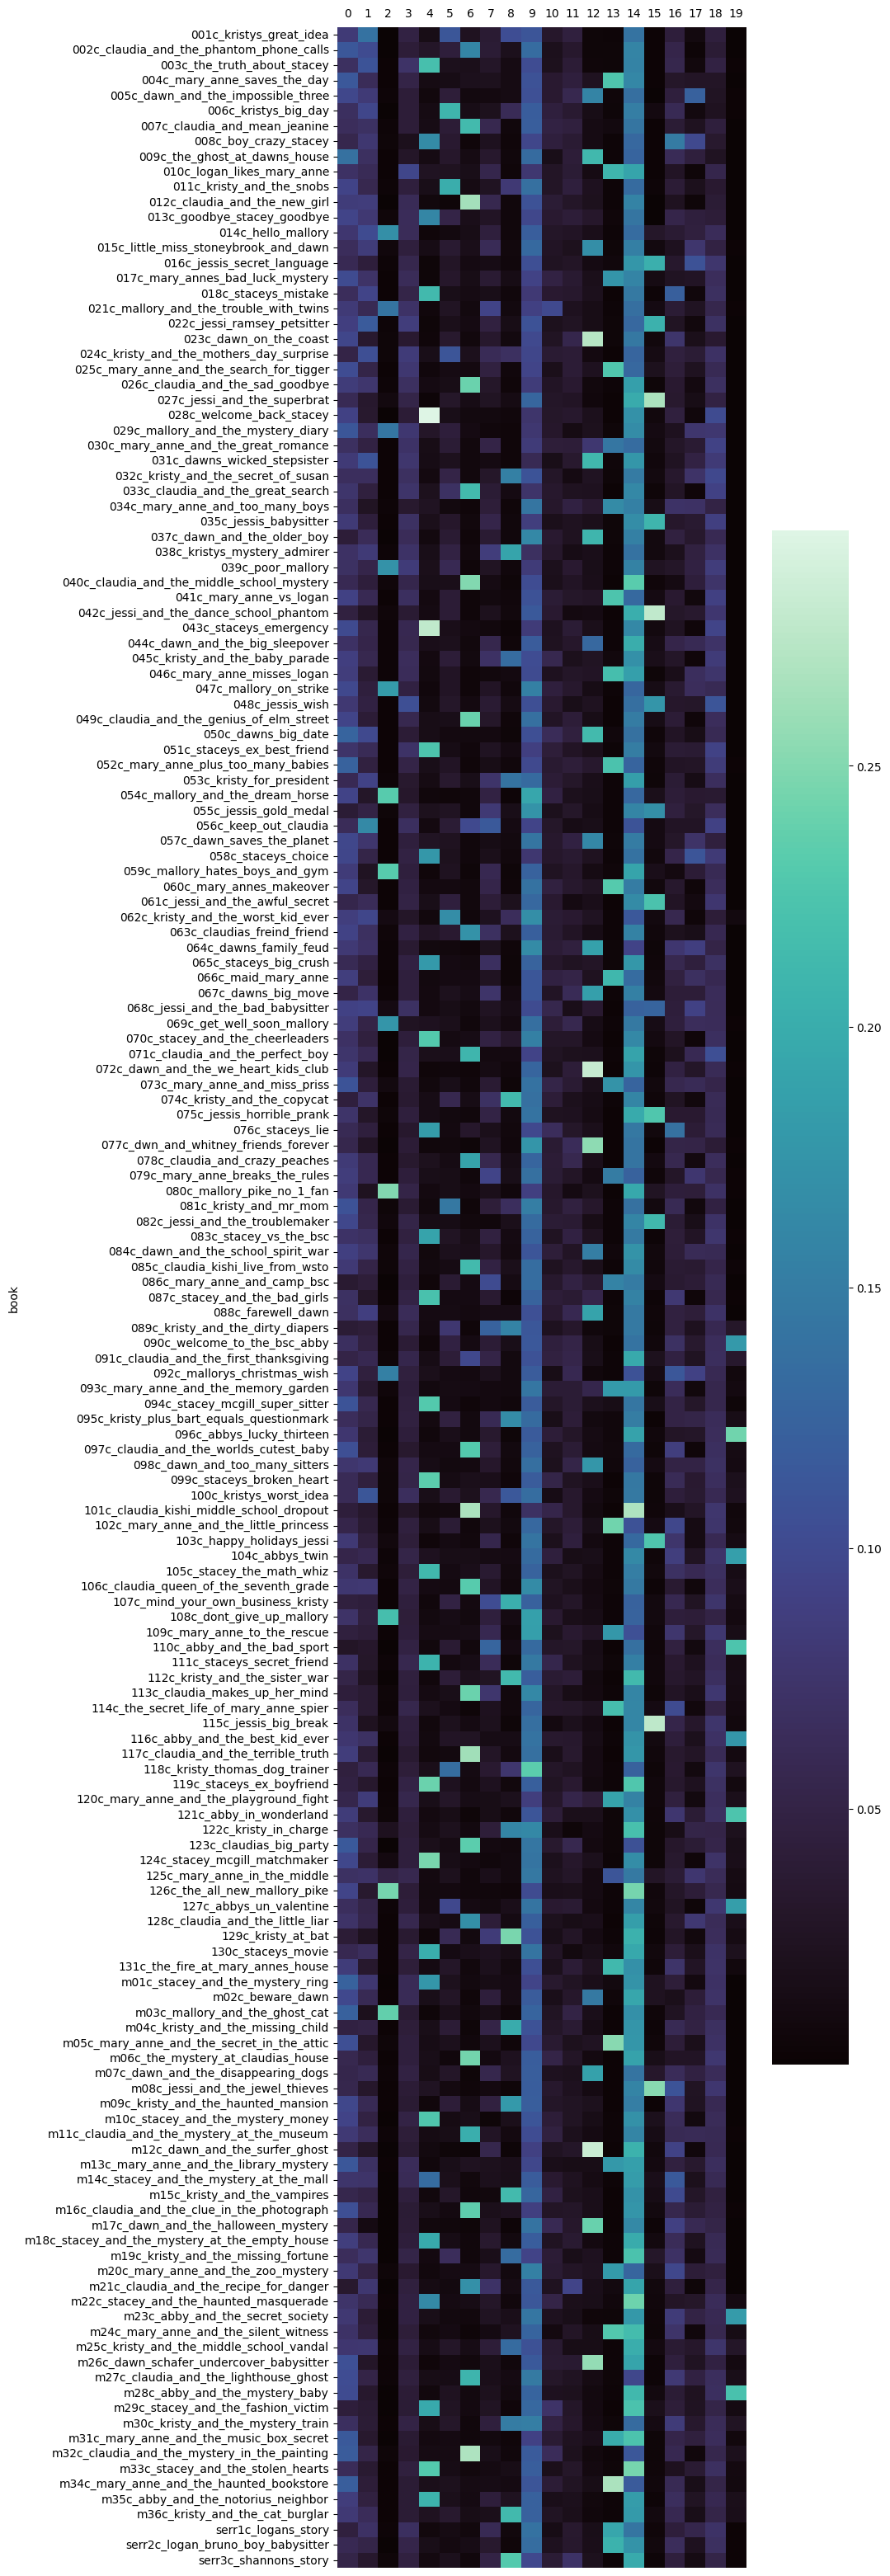

In [ ]:
# Plotting books by topics
plt.figure(figsize=(8,40))
seaborn.heatmap(book_df, cmap='mako')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

We can see the signature of character-specific topics by being mostly dark with bright spots on relevant characters: 2 lights up for Mallory, 4 for Stacey, 6 for Claudia, and so on. In contrast, topics like the ones highlighted in our table above seem to show up more evenly throughout all of our documents.

If we really want to focus per character, it’d be easier to just focus on narrator:

<Axes: ylabel='narrator'>

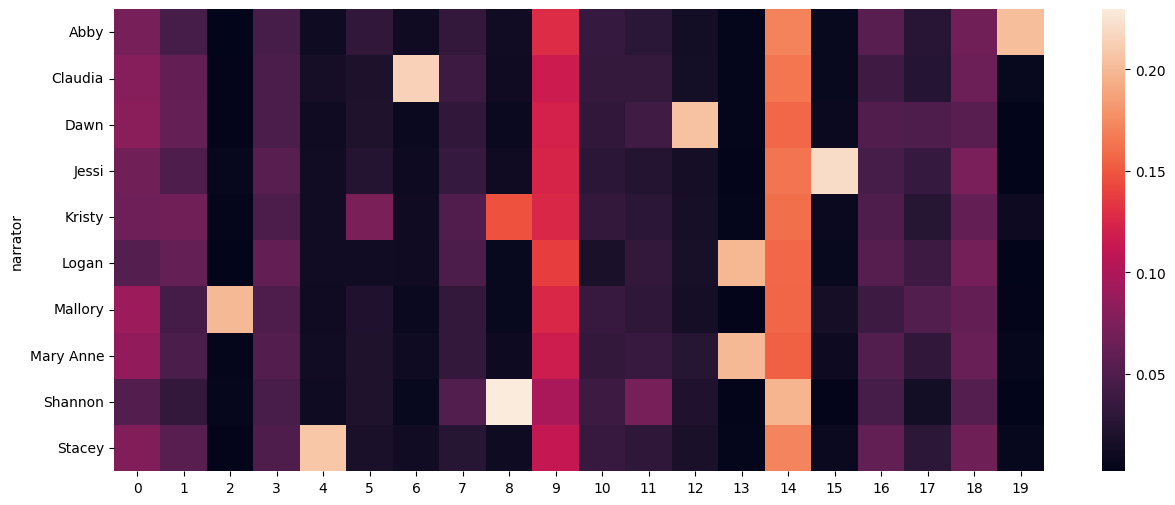

In [ ]:
# Plotting narrators by topics
plt.figure(figsize=(15,6))
narrator_df = pd.DataFrame()
for i in range(ntopics):
    narrator_df[str(i)] = doctopics_df.groupby('narrator').apply(lambda gp: np.average(gp[str(i)], weights=gp['ntokens']))
seaborn.heatmap(narrator_df)

This helps us confirm our topic assignments from before for 2 (Mallory), 4 (Stacey), and 6 (Claudia), as well as showing Dawn (12), Jessi (15) and Abby (19). It also gives us some weird things like Kristy and Shannon sharing a topic (8) and Mary Anne and Logan sharing another (13). Given the prominence of some of these characters and how distinct we expected the main baby-sitters to be, this was a bit of a surprise to me – maybe we need more topics to better represent distinctions between these characters?

```{admonition} Quinn
It's reading-with-eyeballs to the rescue! As a childhood <em>Baby-Sitters Club</em> reader, I know that having Shannon and Kristy, and Mary Anne and Logan, sharing a topic actually makes a lot of sense. Logan is Mary Anne's boyfriend, and Shannon is a neighbor from Kristy's new rich neighborhood. They almost never show up without Mary Anne or Kristy, respectively, other than in the couple "Reader's Request" super specials where they're the narrator.
```

#### Trends over chapters
Lastly, let’s do a slightly different plot to look at topics versus chapters. Here, I’m going to treat chapters as a sort of timeseries, since most books are around the same length: we’ll just treat chapter numbers as times and plot topic proportion over time. We expect that if a topic shows up a lot in topic 2, then it should spike at x=2; if it shows up more towards the end of books, it should have an upward slope.

Before we do this, we need to do the same thing for chapters as we did before for books. Then, to help us plot, we're going to do some bonus processing to split our one row per segment into `ntopics` rows, one for each specific proportion we want to plot. (Admittedly, I'm pretty sure there's a nice pandas-y way to do this, but I was having trouble remembering how, so I just wrote some loops to make my data fit. A little ugly, I know, but it gets the job done!)



In [ ]:
# Per-chapter aggregation of topic proportions
chapter_df = pd.DataFrame()
for i in range(ntopics):
    chapter_df[str(i)] = doctopics_df.groupby('chapter').apply(lambda gp: np.average(gp[str(i)], weights=gp['ntokens']))

# This is a hacky way to try to get one row for each individual topic-document proportion,
# which will help split plots into other dimensions over chapters
data = []
for row in doctopics_df.itertuples():
    for k in range(ntopics):
        # segment, topic, chapter, book, narrator, proportion, n_tokens
        data.append([row[2], str(k), row[3+ntopics], row[4+ntopics], row[5+ntopics], row[3+k], row[6+ntopics]])

topic_obs_df = pd.DataFrame(data, columns=["segment_name", "topic", "chapter", "book", "narrator", "proportion", "n_tokens"])

Now that we have a new dataframe, it's time to check out how topics move throughout our book chapters!

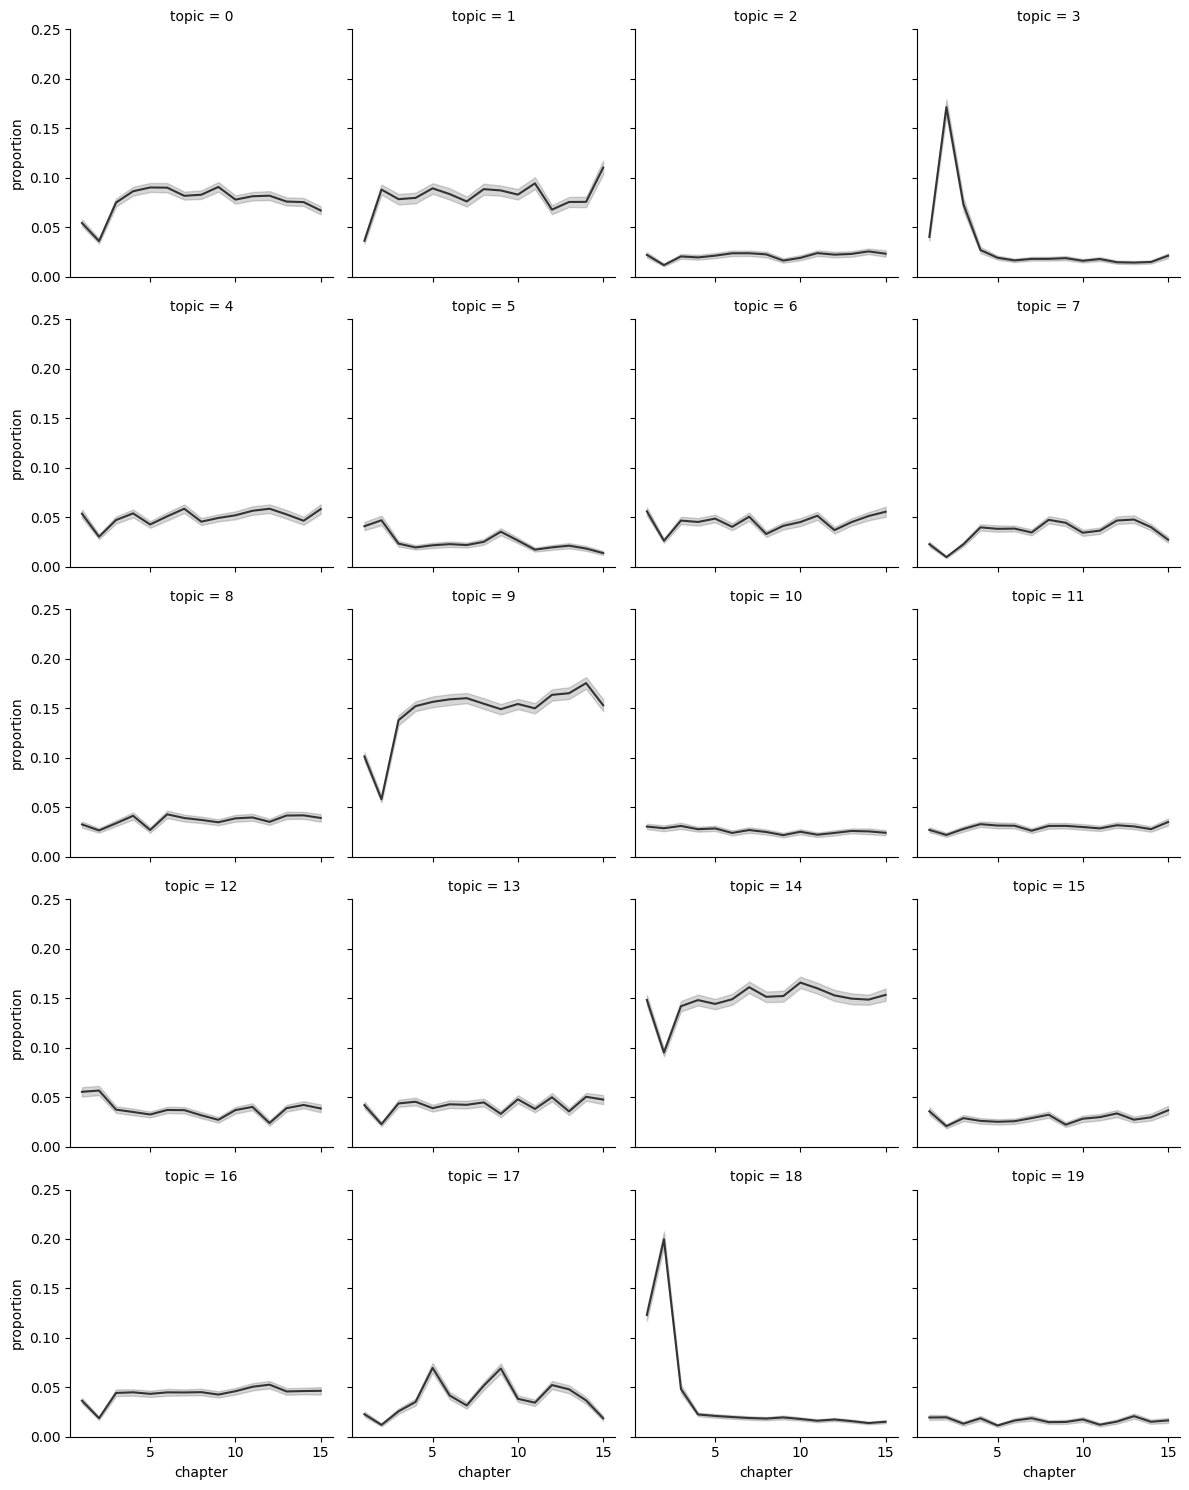

In [ ]:
# Borrowing from https://seaborn.pydata.org/tutorial/axis_grids.html
# Topics over chapters
g = seaborn.FacetGrid(topic_obs_df, col="topic", col_wrap=4, ylim=(0,0.25))
g.map(seaborn.lineplot, "chapter", "proportion", color="0.2")

This is a pretty conclusive sign that chapter 2 is a little different. We see spikes for topics 3 and 18 there, as well as dips in some of the other topics in the same spot. (It’s hard to read much from the dips: since the probabilities all have to sum to 1, if a couple topics are extra high in one chapter, the other ones just have less space to be present!) We can also see a couple of subtler weird things, including topic 5 (which seems to go down a little over time) and topic 17 (which seems to be a little spikier). However, the keys for both are a little overwhelmed by names, so it’s hard to make sense about what those topics might be about! We’ll try to check those out in a bit.

At this point, I got really excited about data analysis, and it occurred to me that we can combine our narrator and chapter analysis, breaking down each narrator in each topic with their own colored line in each plot! So I made a plot to do just that.


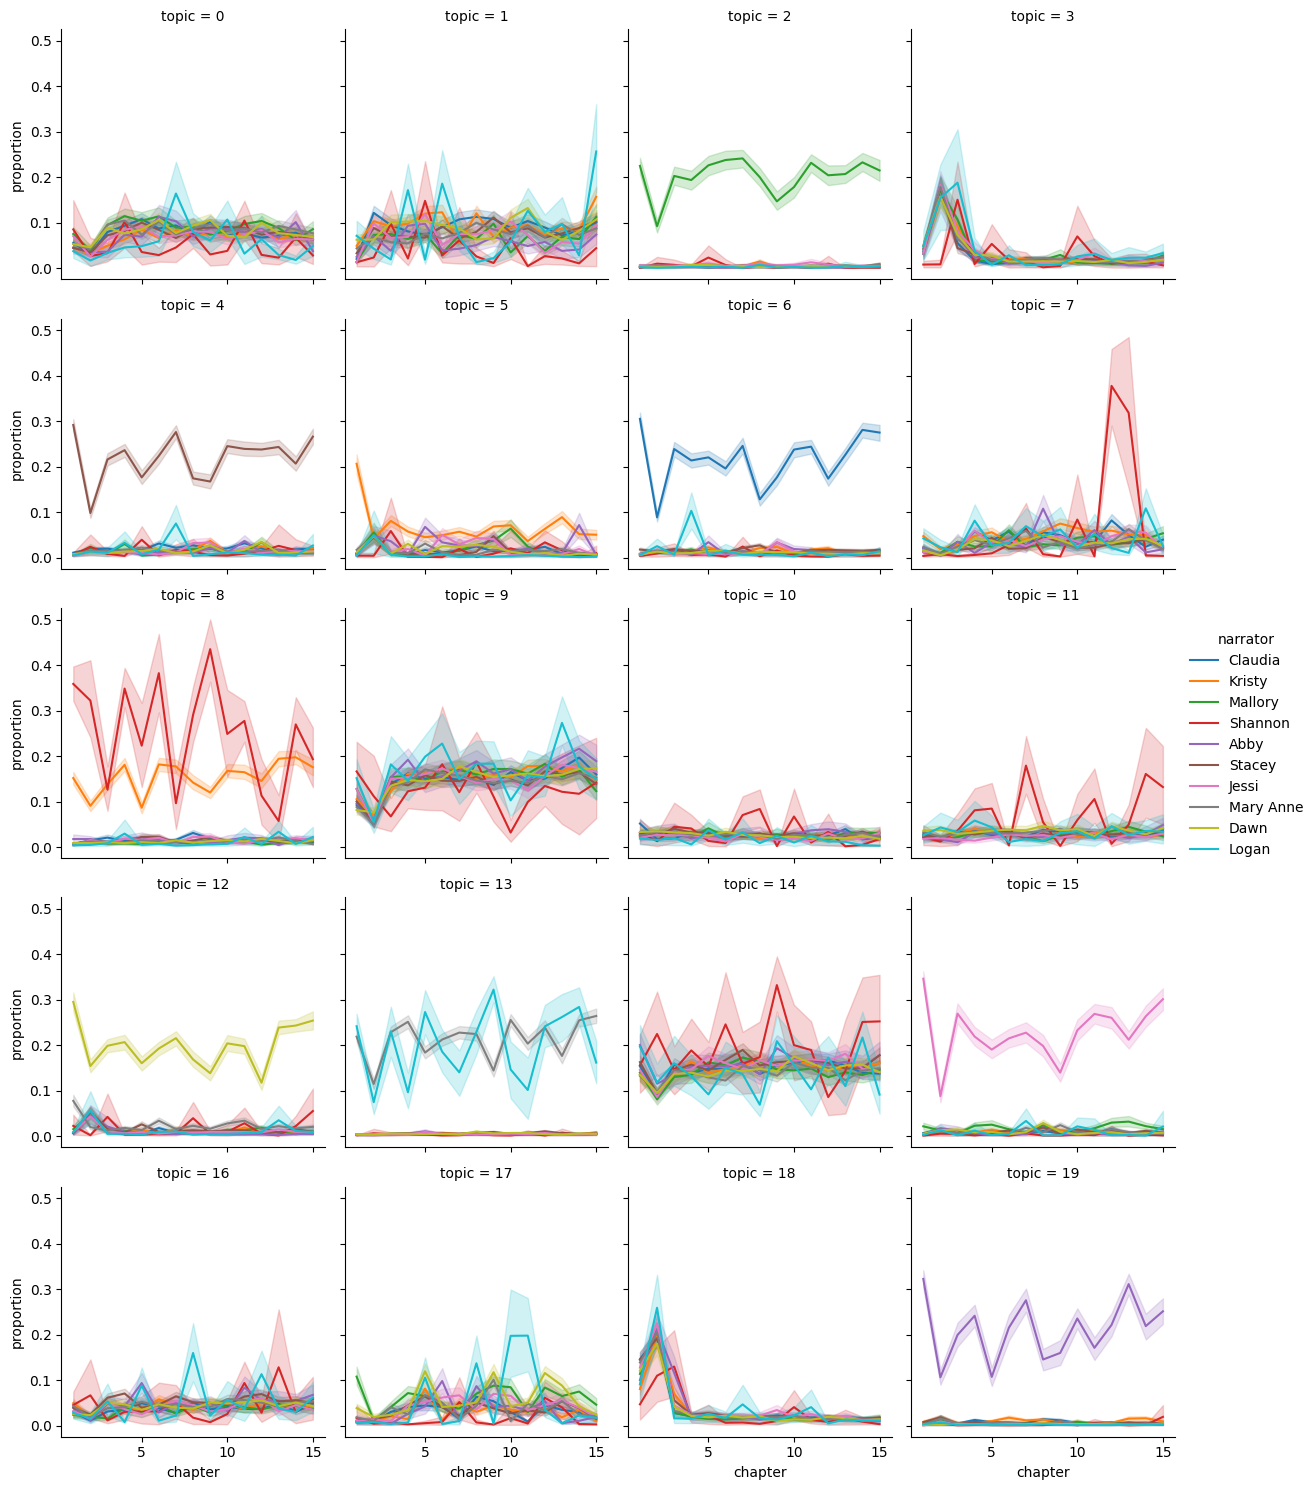

In [ ]:
# Again, but broken down by narrator -- too much data! (Also runs slowly!)
g = seaborn.FacetGrid(topic_obs_df, col="topic", hue="narrator", col_wrap=4, sharey=True)
g.map(seaborn.lineplot, "chapter", "proportion")
g.add_legend()

I looked at this plot and realized I'd made a mistake: this data is so broken down that it's too much to meaningfully take in. Even though I have a couple of questions that come up looking at these, including why there seem to be numerous examples of character-specific topics with a 3-chapter rhythm of rising and falling, they're too jumbled to be able to chase down quickly. I can confirm that all of our narrators spike in early chapters for topics 3 and 18, not just a few, though it looks like maybe Shannon’s more likely to lag an extra chapter...however, it's not clear whether this is just random variation or not from these plots.

I kept the plot above mostly as a reminder for myself of why it’s good to use caution when slicing up data too much: if you plot too many things (in this case, 10 narrators * 20 topics = 200 trend lines), some of them will probably look like they're doing something interesting by total random chance. This is related to the common statistical [jelly bean problem](https://xkcd.com/882/): if your test for "significance" means "there's a less than 5% chance that a population with only boring things happening would produce data that looks this not-boring", and you run that test on 200 different things, you'd expect about 10 of them to come up as "significant" just by chance.

### But what are they saying?
It can be helpful to look at *top documents* for particular topics to see what’s actually being said in them. Here, "documents" are just going to be short passages with a high proportion of a topic we're interested in, so we can get a sense of not just what words and names are present, but the context in which they're showing up. This is a surprisingly easy step to skip, but often the most important for making sure your topics mean what you think they mean. I'm writing my function especially so it'll print them out with the bold face `**` and new lines `\n` that will help me make it look nice when I paste it in later.

In [ ]:
def get_top_docs_for_topic(topic_no, k=10):
  top_k_idxs = doctopics_df.sort_values(str(topic_no), ascending=False).head(k)
  top_k_data = pd.merge(top_k_idxs, docs_df, how="inner", left_on=['segment_name'], right_on=['id'])
  for idx, row in top_k_data.iterrows():
    print("**{} - {}, Chapter {} ({:.2%})** {}\n".format(row['segment_name'], row['narrator'], row['chapter'], row[str(topic_no)], row['text']))

get_top_docs_for_topic(3)

**127c_abbys_un_valentine_2.txt-7 - Abby, Chapter 2 (97.07%)** We meet Monday, Wednesday, and Friday afternoons, from five-thirty until six at Claudia's. Clients know that if they call us during meeting times, they'll reach six reliable, experienced baby-sitters. Since Claudia has her own phone number, the line isn't busy with family calls (and Claud's family isn't prevented from using the phone while we are meeting). When a client calls, Mary Anne checks the record book to see who is available and we schedule the baby-sitting appointment. We pay dues every Monday. The club uses the money to pay Kristy's older brother Charlie for gas (he usually drives Kristy and me to meeting — I live two houses down the street from Kristy), to contribute to Claudia's refreshments fund, to splurge on the occasional pizza party, and to keep our Kid-Kits stocked.

**042c_jessi_and_the_dance_school_phantom_4.txt-8 - Jessi, Chapter 4 (96.99%)** Where does the money come from? Well, it’s like this. We keep

Here’s the top 10 documents for topic 3 and topic 18, our chapter-2-associated topics:

#### Topic 3
**127c_abbys_un_valentine_2.txt-7 - Abby, Chapter 2 (97.07%)** We meet Monday, Wednesday, and Friday afternoons, from five-thirty until six at Claudia's. Clients know that if they call us during meeting times, they'll reach six reliable, experienced baby-sitters. Since Claudia has her own phone number, the line isn't busy with family calls (and Claud's family isn't prevented from using the phone while we are meeting). When a client calls, Mary Anne checks the record book to see who is available and we schedule the baby-sitting appointment. We pay dues every Monday. The club uses the money to pay Kristy's older brother Charlie for gas (he usually drives Kristy and me to meeting — I live two houses down the street from Kristy), to contribute to Claudia's refreshments fund, to splurge on the occasional pizza party, and to keep our Kid-Kits stocked.

**042c_jessi_and_the_dance_school_phantom_4.txt-8 - Jessi, Chapter 4 (96.99%)** Where does the money come from? Well, it’s like this. We keep all the money we earn on jobs — that’s ours. But every Monday, we pay club dues. (Not without a lot of complaining, I might add — we hate to part with our hard-earned money.) The dues are used for club stuff, like paying Kristy’s brother Charlie to drive her back and forth to meetings since she lives too far away to walk now. We also use the money for the occasional pizza bash or for sleepover munchies. (We’re not all business, all the time!) And we use some of it for supplies for our Kid-Kits. Kid-Kits are yet another of Kristy’s great ideas. They’re really just cardboard boxes, but we’ve each decorated our own with all kinds of stickers and sequins and stuff. The boxes are stocked with things that kids love — crayons and books and puzzles and paper dolls … stuff like that. We bring them on any job where they might come in handy.

**058c_staceys_choice_2.txt-15 - Stacey, Chapter 2 (96.16%)** To help the club work even more effectively, Kristy came up with three more great ideas. One was the club notebook in which each club member must write up every sitting job she goes on. Then the rest of us are responsible for reading it once a week. This is a good way to keep up with the lives of the children we care for, and to find out how our friends handled sitting problems. The second idea was Kid-Kits. She invented the idea of decorating an ordinary cardboard carton and filling it with her old games, books, and toys, plus some new things such as art supplies, and bringing it with her on sitting jobs. Now we each have a Kid-Kit — and we have become very popular sitters! The third idea was to sign up two extra club members as associates. The associate members don’t attend meetings. They’re reliable sitters we can call on if a job happens to come along that none of us is available to take. That doesn’t happen often, but when it does, we’re extremely grateful for Shannon Kilbourne (a friend of Kristy’s who lives in her new neighborhood) and Logan Bruno who is … Mary Anne’s boyfriend!

**089c_kristy_and_the_dirty_diapers_2.txt-14 - Kristy, Chapter 2 (96.10%)** Mary Anne is a great club secretary. Her job is to maintain the record book. When a call comes in, she needs to know exactly who’s available. (That means keeping track of all our conflicts — ballet classes, art lessons, doctor appointments, after-school activities, blah blah blah.) Then she helps assign the job, making sure everyone does a roughly equal amount of work. She carefully records each job on a master calendar. In the back of the book, she keeps an up-to-date client list: addresses, phone numbers, rates paid, and any special information about the kids.

**080c_mallory_pike_no_1_fan_2.txt-20 - Mallory, Chapter 2 (95.87%)** When Claudia’s phone rings, the person sitting nearest answers, and takes down the client’s information. She tells the client we’ll call right back, and then asks Mary Anne who can take the job. Mary Anne is the club secretary. She keeps the record book in order. The record book lists everyone’s schedules (my orthodontist appointments, Jessi’s ballet classes, Stacey’s doctor appointments, etc.). It also contains information about our clients — addresses, rates paid, plus records of our charges’ allergies or any special problems.

**030c_mary_anne_and_the_great_romance_3.txt-7 - Mary Anne, Chapter 3 (95.36%)** Jessi and Mal, our junior officers, don’t have actual jobs. Junior officer means that they’re not allowed to baby-sit at night yet, unless they’re taking care of their own brothers and sisters. But they’re a great help to us because they can handle lots of the afternoon and weekend jobs, which frees us older sitters up for evening jobs. Even so, there are times when calls come in for jobs that, for one reason or another, none of us can handle. When that happens, we call on our associate members. There are two of them. They don’t come to meetings, but they’re responsible baby-sitters who can back us up so that we don’t have to disappoint any of our clients by telling them that we can’t provide them with a sitter. One of the associate members is a friend of Kristy’s in her new neighborhood, Shannon Kilbourne. Guess who the other associate member is — Logan Bruno!

**m04c_kristy_and_the_missing_child_2.txt-2 - Kristy, Chapter 2 (95.21%)** I think the club works so well because of the way we set it up. We meet on Mondays, Wednesdays, and Fridays from 5:30 to 6:00. Any parent who needs a sitter can call during that time, and they’ll be sure to find one. Simple, right? Our clients think so. They are incredibly happy to have seven reliable sitters a phone call away. We hardly ever have to distribute flyers or advertise, since we have plenty of business. Many of our clients have been using our club for quite a while now, and we’ve gotten to know their kids pretty well. We keep up-to-date with what’s going on with them by writing in and reading the club notebook, where all the members record the details of each job they go on.

**096c_abbys_lucky_thirteen_3.txt-2 - Abby, Chapter 3 (95.21%)** We also write, every single meeting, in the club notebook. (Another Kristy Idea). That’s where we keep a record of who we sat for and what happened. We are all responsible for reading the notebook once a week, to keep ourselves up-to-date on what’s happening with our regular clients, and what new clients are like. Another club book is the record book, kept by Mary Anne (who’s never, ever made a mistake!). It contains our client list, with names, addresses, and phone numbers, plus each member’s schedule of extracurricular activities and baby-sitting jobs.

**125c_mary_anne_in_the_middle_2.txt-22 - Mary Anne, Chapter 2 (95.15%)** On Mondays, Stacey, our treasurer, collects dues. She took this job because she's our resident math whiz. We all groan when she comes around with the manila envelope she uses as our treasury, but it's more of a joke than a real complaint. We know we have to pay. We spend the money on Claudia's phone bill. Plus, we pay Charlie, one of Kristy's older brothers, to drive Kristy and Abby to meetings, since they live too far away to walk. The dues money also goes toward stocking our Kid-Kits. Kid-Kits are cardboard boxes filled with hand-me-down toys, art supplies, books, and such, that we bring on special sitting jobs. Each of us has her own Kid-Kit. They come in handy on new jobs, on rainy days, or at times when the kids are sick or upset.

**038c_kristys_mystery_admirer_3.txt-7 - Kristy, Chapter 3 (94.99%)** Here’s how we run the club and what our responsibilities are: I am the president, as you know. It’s my job to keep the BSC in good shape and fresh by coming up with new ideas. (Besides, I thought up the club in the first place.) Some of my ideas are Kid-Kits, the club notebook, and the club record book. Kid-Kits are cartons (we each have one) that we decorated with Claudia’s art materials and filled with our old toys, games, and books, as well as some new things, such as coloring books, sticker books, Magic Markers, etc. We sometimes take the kits on jobs with us, and our charges love them. This is good business, because when our charges are happy, then their parents are happy, and when parents are happy, they call the Baby-sitters Club with more jobs for us!

----
#### Topic 18
**028c_welcome_back_stacey_3.txt-5 - Stacey, Chapter 3 (92.29%)** The other things you should know about her are that she’s a gifted artist, she likes to read Nancy Drew mysteries, and she’s a terrible student. The bad-student thing is unfortunate for two reasons. One, Claud has a perfectly good mind; she just doesn’t apply herself in school. Two, her older sister Janine is a genius. She’s so smart that even though she’s still in high school, she’s already taking courses at Stoneybrook’s community college.

**077c_dwn_and_whitney_friends_forever_2.txt-9 - Dawn, Chapter 2 (88.32%)** Stacey McGill is Claud’s best friend and the BSC treasurer. She was born and raised in New York City, which gives her a distinct “city” style. She moved to Stoneybrook with her parents, moved back to NYC with her parents, then moved to Stoneybrook again with her mom after her parents got divorced. Stacey’s a math whiz. She’s got long blonde hair (darker than mine), is an only child (like Mary Anne) and, like me, watches what she eats. But Stacey does it because she really has to. She has diabetes, which means her blood sugar level can go haywire. She has to be very careful with her diet and inject herself every day with insulin.

**071c_claudia_and_the_perfect_boy_2.txt-13 - Claudia, Chapter 2 (88.20%)** Stacey keeps such an upbeat attitude that you’d never guess how many tough things she’s had to deal with. Tough thing number one: her health. Stacey has a very serious form of diabetes, which is a disease in which her body can’t properly regulate the amount of sugar in her system. If she doesn’t watch her diet (absolutely no sugar or junk food) and give herself insulin injections every day, she could go into a coma. I admire how disciplined she is in sticking to all this and how she doesn’t let it get her down.

**088c_farewell_dawn_2.txt-23 - Dawn, Chapter 2 (87.59%)** Mal hates her looks, but I think she’s cute. She has curly reddish-brown hair, brown eyes, and freckles. She can’t stand her glasses, but I don’t think they look bad on her. Someday she’ll be able to get contact lenses if the glasses still annoy her. The clear braces she now wears — and despises — will also come off eventually. If you really study Mallory, you can tell she’ll look just fine as she gets older. And it isn’t hard to see that Jessi is going to be a real beauty. She’s already very pretty with her creamy, dark skin, large, brown eyes, and delicate features. She’s tall with long legs and moves with incredible grace.

**114c_the_secret_life_of_mary_anne_spier_2.txt-16 - Mary Anne, Chapter 2 (87.08%)** As I mentioned, Stacey is beautiful, with giant blue eyes and shoulder-length blonde, wavy hair. Despite being gifted with brains and beauty, her life isn’t perfect. One big problem is her diabetes. That’s a serious condition in which the levels of sugar in her bloodstream can become dangerously high. To keep those sugar levels under control, she has to give herself injections of insulin daily and keep to a strict diet. Stacey doesn’t let this get her down, though. (At least most of the time she doesn’t.) She does what she has to do and pretty much leads a normal life.

**m35c_abby_and_the_notorius_neighbor_2.txt-19 - Stacey, Chapter 2 (86.98%)** Stacey's sophisticated, polished, and very pretty, with beautiful blue eyes and a curly mane of blonde hair. I admire her for the way she's handled her parents' divorce, and for the way she deals with being diabetic. Do you know anyone with diabetes? In case you don't, I'll explain. Diabetes is a lifelong disease that affects the way the body processes sugar. The pancreas produces a hormone called insulin, which helps the body use the fuel it's given (food, in other words). When someone has diabetes the pancreas doesn't work right. That can't be fixed, but diabetes can be managed. Stacey keeps hers under control by being very, very careful about what she eats. She also has to give herself injections of insulin every day, which can't be fun.

**m28c_abby_and_the_mystery_baby_3.txt-11 - Abby, Chapter 3 (86.32%)** Stacey has long blonde hair (usually permed into a mass of fluffy curls), blue eyes, and a knack for dressing in the trendiest styles without looking like some kind of supermodel wannabe. Ever hear of diabetes? That's a disease in which your body doesn't process sugars correctly. Stacey has it. What that means is that she has to be very, very careful about what she eats (no sweet stuff, just a very balanced, healthy diet), and she has to monitor her blood sugar and give herself injections of insulin every day. Tough stuff, but Stacey deals with it well. I think she and I share a special understanding, since we've both had to learn to live with chronic health problems.

**m09c_kristy_and_the_haunted_mansion_2.txt-11 - Kristy, Chapter 2 (86.29%)** The other thing that makes Stacey’s life hard is that she has diabetes. That’s a life-long disease in which the body doesn’t process sugars correctly. What it means for Stacey is that she has to be very, very careful about what she eats (no sweets) and that she has to give herself shots of insulin (which her body doesn’t produce the way it should) every single day. If I had diabetes, I’d probably complain about it to anyone who would listen, but Stacey hardly ever complains. She just deals with it.

**m25c_kristy_and_the_middle_school_vandal_3.txt-11 - Kristy, Chapter 3 (85.83%)** Claud's parents don't want her to eat sweets, but she hides them in her room and eats them anyway. Stacey can't do that. She's diabetic. She has to watch what she eats very, very carefully, monitor her blood sugar constantly, and even give herself insulin injections every day. But while she and Claudia don't have junk food or schoolwork in common (Stacey is a math whiz and she does very well in her other subjects, too), they do share a passion for fashion. Stacey, an only child who grew up in New York City and now lives here with her divorced mom, is deeply into fashion. She loves to shop, and she and Claudia can spend hours discussing their best colors and what they are going to wear to school the next day. But while Claudia's look is wildly original, Stacey's is more New York sophisticated.

**118c_kristy_thomas_dog_trainer_2.txt-12 - Kristy, Chapter 2 (85.59%)** Plus, she looked as if she were slightly older than the rest of us. She isn't, but in some ways she's more worldly and a bit more grown-up. Part of this is because she's from New York City originally. (Her parents are divorced and her father still lives there. She visits him often.) Stacey is also diabetic. Because of this, her parents were super-overprotective of their only child, and Stacey has had to work hard to convince them that she could be responsible about managing her condition. This means that she has to be very careful about what she eats (no sugar or sweets, or she might get really sick), and she has to give herself insulin injections regularly (ouch). It's a big responsibility, but one that Stacey seems to take in stride, accepting it as something that's no more remarkable than her amazing math abilities.

---
What's going on here? The first topic, our club-meeting-logistic topic, is pretty much as expected - dominated by Chapters 2 and 3 and a lot of information about how things usually work in the club, not events specific to the story. We actually have a Chapter 4 passage in here, but it's a discussion of Kristy's other ideas for how the club runs, which makes it feel like a pretty good affirmation that we're getting the kind of content we expect from Chapter 3. Topic 18 is also mostly what we expect, descriptions of sitters - with an interesting note that we're getting an awful lot of Stacey and her diabetes in this discussion. It's not possible from just the top 10 documents to tell exactly what's up, but I'd guess this kind of abbreviated description of diabetes usually gets saved for the babysitter introductions, but that this topic might spread out a little more in books where Stacey's diabetes comes up more, especially from her point of view. It'd be worth being cautious about generalizing this topic without checking that!

Let's pick a different topic, one that we saw wasn't as prominent in general but seemed to correlate heavily with Kristy -- topic 5.

#### Topic 5
**m04c_kristy_and_the_missing_child_1.txt-6 - Kristy, Chapter 1 (94.81%)** For a long time, that was my family. Mom, Charlie, Sam, David Michael, and me. Then Mom met this guy named Watson Brewer, and she married him. I wasn’t crazy about him at first, even though he is a millionaire, but now I really like him. Watson had also been married once before, and he has two children, Karen (she’s seven) and Andrew (he’s four). They’re both Krushers, too. They live with us every other weekend and for two weeks in the summer. The rest of the time they live with their mother and stepfather.

**125c_mary_anne_in_the_middle_2.txt-3 - Mary Anne, Chapter 2 (94.50%)** Kristy's life changed again when her mother married Watson Brewer. That's because her new stepdad is a millionaire. The Thomas family moved across town to his mansion and became part of a new, blended family. That new family includes seven-year-old Karen and four-year-old Andrew, Watson's kids from his first marriage, who live at his house every other month. They adored Kristy instantly. Kristy also gained another younger sister, this one a full-time resident, when Watson and Kristy's mom adopted a baby girl from Vietnam. Emily Michelle is now about two and a half. Kristy's grandmother, Nannie, moved in to help with the younger kids — Emily Michelle, in particular. And, with assorted pets, including their puppy Shannon, and a kitten named Pumpkin, they have a very full house. It's a good thing it's a mansion.

**088c_farewell_dawn_2.txt-14 - Dawn, Chapter 2 (94.41%)** Watson has two young kids of his own from his first marriage (Karen, who is seven, and Andrew, who is four). Then, Kristy’s mom and Watson adopted a little girl from Vietnam named Emily Michelle who is now two and a half. Kristy’s grandmother (her mom’s mom) came to live with them to help take care of Emily Michelle. Karen and Andrew live with Watson every other month and with their mother the rest of the time. They adore Kristy and she adores them back.

**m34c_mary_anne_and_the_haunted_bookstore_2.txt-5 - Mary Anne, Chapter 2 (93.83%)** Back then, Kristy and I still lived next door to each other on Bradford Court. Kristy lived with her mom; her two older brothers, Charlie and Sam; and David Michael. Her dad left the family when David Micheal was a baby, and Kristy only hears from him once in awhile. Not long ago, Kristy's mom married a guy named Watson Brewer and the family moved to his mansion across town. Watson is a millionaire and their house is truly a mansion. In addition to Kristy and her brothers, Watson's two children from his first marriage, Karen and Andrew, live there every other month. And after Kristy's mom and Watson married, they adopted a little girl from Vietnam, Emily Michelle, who's now two and a half. When Emily Michelle came aboard, Kristy's grandmother moved in too, to help out. Since there are almost as many pets as people in the Thomas/Brewer household it's a good thing Kristy likes kids and animals as much as she does.

**051c_staceys_ex_best_friend_2.txt-5 - Stacey, Chapter 2 (93.49%)** Kristy has a very interesting family. She lives with her mom; her stepfather; her three brothers (Sam and Charlie, who are in high school, and David Michael, who’s just seven); her grandmother; her adopted sister, Emily Michelle, who’s two and a half; and (part-time) her stepsister and stepbrother, Karen and Andrew, who are seven and four. Before Kristy’s mom met Watson (Kristy’s stepfather), the Thomases lived in a modest house across the street from Claud. Then Watson came into their lives and whisked them into his mansion on the other side of town. (Watson is a millionaire.)

**091c_claudia_and_the_first_thanksgiving_2.txt-8 - Claudia, Chapter 2 (93.45%)** It’s no ordinary house, either. Watson Brewer is a real, live millionaire, and he lives in a mansion. Now all the Thomas kids not only have rooms of their own, but they also have an even bigger family, including Watson’s two kids from his first marriage, Andrew and Karen, who live with Watson every other month. Watson and Kristy’s mother also recently adopted Emily Michelle, who is Vietnamese. After that, Kristy’s grandmother Nannie moved in, to help take care of Emily Michelle (and everyone else). Kristy’s new, bigger family also includes a Bernese mountain dog puppy named Shannon, Boo-Boo the cranky cat, a couple of goldfish, other assorted, er, wildlife, and maybe, just maybe, the ghost of Ben Brewer, one of Watson’s ancestors.

**129c_kristy_at_bat_1.txt-4 - Kristy, Chapter 1 (93.24%)** He also happens to be a millionaire. Which means that I live in a mansion. Yup, it's true. When my mom married Watson, we all moved across town to share his house. Which is huge. And that's lucky, because our family is huge too. Apart from David Michael and Karen, there are my two older brothers, Charlie and Sam (Charlie's seventeen, Sam is fifteen); Karen's younger brother, Andrew, who's four (Karen and Andrew are Watson's children from his first marriage; they live with us every other month); and Emily Michelle, who's just a toddler. She was a Vietnamese orphan who joined our family when my mom and Watson decided to adopt a baby together.

**121c_abby_in_wonderland_2.txt-5 - Abby, Chapter 2 (93.17%)** Kristy, her mother, and her three brothers had been through some hard times. Their father deserted them shortly after David Michael, Kristy's younger brother, was born. (What a creep!) Their mother had to struggle to support them all. She did it, though. They were already on a pretty even keel when she met Watson Brewer, who became Kristy's stepdad. Watson just happens to be megarich. When he married Mrs. Thomas, Kristy and her family moved across town to the neighborhood where I live and where Watson's mansion is located. The household now includes Kristy's adopted sister, Emily Michelle, who is about two and a half. (Watson and Kristy's mom adopted her from Vietnam.) Plus Karen, who's seven, and Andrew, who's four. They're Watson's kids from his first marriage, and they live there every other month (the remaining time, they're with their mother). Mrs. Brewer's mother, whom everybody calls Nannie, lives there too.

**097c_claudia_and_the_worlds_cutest_baby_2.txt-6 - Claudia, Chapter 2 (92.58%)** For most of our lives, Kristy lived across the street from me. When we were little, her dad walked out on the family, leaving Mrs. Thomas to raise four kids on her own, including David Michael, who was just a baby. (Kristy has two older brothers, fifteen-year-old Sam and seventeen-year-old Charlie.) For years, Mrs. Thomas held the family together by herself. Then she married a very rich guy named Watson Brewer, and Kristy and her family moved into his mansion (far away from me … sigh). Watson and Kristy’s mom adopted a two-year-old Vietnamese girl, whose name is Emily Michelle. Then Kristy’s grandmother, Nannie, moved in. She helps take care of Emily. Watson’s two kids from a previous marriage, Andrew (who’s four) and Karen (seven), live in the house during alternate months.

**049c_claudia_and_the_genius_of_elm_street_2.txt-5 - Claudia, Chapter 2 (92.00%)** Everything changed for Kristy’s family not long ago. Mrs. Thomas met this millionaire named Watson Brewer. They fell madly in love and got married, and the Thomases ended up moving into a huge mansion. And let me tell you, that house needs to be huge. Watson is the divorced father of two kids, Karen and Andrew, who spend every other weekend and some vacations and holidays at the house. Then there’s Emily Michelle, an adorable two-and-a-half-year-old Vietnamese girl whom Watson and Kristy’s mother recently adopted. Then there’s Nannie, Kristy’s grandmother on her mom’s side, who now lives there and helps take care of Emily Michelle. And then there are Boo-Boo and Shannon, a cat and a dog.

---

Aha! This is definitely a topic about Kristy’s family. The specificity of this, and the fact that lots of other narrators single out the uniqueness of Kristy’s family, might be part of why we didn’t get as distinct a single Kristy topic as some of the other babysitters did. Looking back, it’s clear the list of names is all Kristy’s family, pretty much, but that’s not always evident from a list of names (especially common ones), so it’s good to have some skepticism. We also can notice that this doesn’t light up for all Kristy books – mostly just ones where Kristy’s family figures heavily into it. Neat!

Let’s also check out Topic 17 while we’re here, our mysterious spiky topic:

#### Topic 17

**052c_mary_anne_plus_too_many_babies_11.txt-6 - Mary Anne, Chapter 11 (89.56%)** “Me, too,” said Vanessa. She looked hopefully at Byron. Byron sighed. “Okay. I’ll be your husband,” he said. “But only for tonight.” “Who will be my husband?” asked Margo. “Not me,” said Adam defiantly. “I am never, ever getting married.” “Jordan?” said Margo. “Oh, all right.” Surprisingly, Nicky agreed to be Claire’s husband. “Okay, let’s adopt babies!” cried Vanessa.

**111c_staceys_secret_friend_8.txt-4 - Stacey, Chapter 8 (88.41%)** “Football!” cried Margo Pike (who’s seven) as she came down the stairs. “Who’s playing football? I want to play.” “No girls,” Nicky told her, scowling. “It’s a touch football game.” “No girls? That’s silly. Why don’t we all go together?” Mallory suggested. “I’ll get Claire ready.” Claire, who’s five, is the youngest Pike. “Ah, come on,” Nicky groaned. “Claire isn’t going to play, is she?”

**073c_mary_anne_and_miss_priss_9.txt-1 - Mary Anne, Chapter 9 (86.59%)** “We’re going to divide the team into two groups,” Adam announced as Shannon and the Barretts arrived. “I want to be on Buddy’s team,” Nicky Pike shouted. “Me, too,” Suzi Barrett cried. “Becca Ramsey and I have to be on the same team,” Haley Braddock declared. “I want to be with Haley and Becca!” Margo shouted. Adam waved his hands in the air. “Quiet! Quiet, everybody! We’ll pick the teams and you have to do what we say.”

**068c_jessi_and_the_bad_babysitter_6.txt-9 - Jessi, Chapter 6 (86.12%)** “I have a better idea,” said Suzi excitedly. “I’ll be the mother lion and Marnie can be my baby. The playpen could be our cave.” “Okay,” Wendy agreed. “I’ll be a hunter!” cried Buddy enthusiastically. He held up his forefingers as if they were guns. “Pow! Pow! I shot the lions dead!” “We are not dead!” Suzi yelled indignantly. “There are no hunters in this game. Besides, you know the rule, Buddy. No playing guns.”

**serr1c_logans_story_10.txt-2 - Logan, Chapter 10 (86.12%)** "That doesn't mean —" Mal began. "How about ice cream?" Vanessa asked. "Of course not!" Mal said. "Well, it has milk in it," Vanessa replied. "Can I have some ice cream at the fair?" Claire asked. "There's no ice cream at a health fair, dum-dum," Jordan said. "I'm not a dum-dum!" Claire cried. "I guess that means no cotton candy, either," Adam said.

**122c_kristy_in_charge_9.txt-9 - Kristy, Chapter 9 (85.14%)** "But I'm a teacher," Margo reminded her. "A student teacher." "You said assistant teacher." "It's the same thing," Vanessa replied. "Now, if we might get back to class, please." "I'm not playing," Nicky announced. "Nicky, I think you are playing," Vanessa said confidently. "Because if you aren't, I can report on a certain someone and his friends who stomped all over the bushes by the driveway the other day while trying to catch a ball. Right now, Mom and Dad think Pow did it." (Pow is the Pikes' basset hound.) "But I know what really happened."

**068c_jessi_and_the_bad_babysitter_11.txt-12 - Jessi, Chapter 11 (85.14%)** “Now?” Margo wailed. “I think we better.” “But … but …” Margo protested desperately. “Could Mallory and Jessi come with me?” “Mallory is sick,” Mrs. Pike replied. “Jessi, do you want to come?” “I’ll come. Sure,” I agreed. “Mallory, do you think you can get another sitter to come over while we’re gone? We’ll only be about an hour,” Mrs. Pike said.

**032c_kristy_and_the_secret_of_susan_5.txt-2 - Kristy, Chapter 5 (85.14%)** “A stupid poem,” said Adam. “It was not stupid!” exclaimed Vanessa. “Kindergarten baby, stick your head in gravy —” Nicky began. “Enough, enough, enough!” cried Mal. “Look. The weather is lovely. Why don’t you guys go outside? You could ride your bicycles —” “Nah,” said Jordan. “— or go skateboarding —” “Nah,” said Nicky. “You could stay inside,” suggested Jessi. “There are plenty of things to do here, too. You could play a game —”

**117c_claudia_and_the_terrible_truth_5.txt-7 - Claudia, Chapter 5 (85.14%)** "You faker," Nicky was yelling. "It's not real," shouted Claire. "No fair!" "You don't win the race," said Becca. "Cheater, cheater," she began to chant. "What's going on?" Mal asked. Adam, who was the one everyone was yelling at, answered, "We were having a contest to see who could find the first four-leaf clover because it's like a shamrock and it's Irish. Plus, it's lucky."

**m27c_claudia_and_the_lighthouse_ghost_6.txt-10 - Claudia, Chapter 6 (84.01%)** "No way!" Buddy replied. "That place is haunted." "I'm not allowed to stay up until midnight, anyway," James said. Ben shrugged. "Too bad, because that's when the comet's supposed to come." James looked horrified. "It is?" "The newspaper said between eight and midnight," Jessi said. "By midnight it'll be barely visible." "You know, we're lucky," Mathew spoke up. "If we were back home in Australia, we wouldn't see the Veehoff Comet."


---



Wow - it looks like this captured a bunch of rapid-fire dialogue! We’re still getting lots of names, but instead of being because of a consistent set of characters, it’s because it’s a combination of lots of names co-occurring with lots of words associated with dialogue turn-taking and spoken utterances from our characters. Of course, the names are dominating this topic, which means if you just look at the top 10 words in the topic, it seems like it’s not learning much useful…it’s only word 12 where you get “asked” and 25 where you get “replied”. This is part of why I encourage getting the top 50-ish words, even if it seems like overkill; if things like names are dominating your corpus, this’ll be enough for you to work in combination with top documents to see if something more interesting is happening.

Topic 17 is the sort of topic I love chasing down more; while I don’t think it’s really following a meaningful spiky pattern (we can see once we break it down by characters the three spikes are hard to spot) we can get the sense from the by-book analysis that this kind of dialogue isn’t prominent in every book or for every baby-sitter. Are these concentrated around babysitters with younger siblings, or consistent multi-kid gigs?

```{admonition} Quinn says
That's exactly what's happening. The BSC books have a pretty predictable main plot / babysitting-related subplot pattern of alternating chapters, and this kind of stuff is standard fare for babysitting scenes.

```

But of course, the real question we wanted to get at was about chapter 2: how did this norm form? What does chapter 2 mean for us? Let’s try diving in to chapter-by-chapter book-by-book topic breakdowns.

### The making of Chapter 2
Let’s remind ourselves of our Chapter 2-y topics. We have two that stuck out in this model, Topics 3 and 18:


| Topic # | Alpha  | Keywords|
|----|---------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
                       |
| <font color="limegreen">3  | <font color="limegreen">0.06677 | <font color="limegreen">club kristy bsc members job phone baby-sitters meeting call jobs meetings claudia she's book it's kids sitting member kristy's notebook money that's record stacey claudia's idea clients time business baby-sitting president anne great shannon don't sitters parents sitter calls logan dues good things room monday kid-kits mary we're associate times  |
| <font color="limegreen">18 | <font color="limegreen">0.0846  | <font color="limegreen">she's stoneybrook hair it's parents don't doesn't school long family that's he's they're friends eyes grade moved pretty things lot people friend brown good sister love live can't lives thing city bsc york great big baby loves life day clothes fact younger short time boyfriend kind black years club makes                                            |



Topic 3 is a meeting logistics topic: it seems to be associated with dues, officers, recording, and the business part of the club. This matches the typical description of how a conventional BSC meeting runs, and we’ve looked up examples to confirm that’s what’s going on here. Topic 18, in contrast, is describing characters in terms of hair and eye color, clothing, family, likes/dislikes, etc. We also checked and confirmed this is our usual chapter-2 recipe for describing characters.

We’re pretty sure both of these topics should be prominent in Chapter 2 of most baby-sitter’s club books. But what if we could see a little more about that pattern? Let’s just look at topic proportion for Topics 3 and 18 for Chapter 1, 2, and 3 of each book:

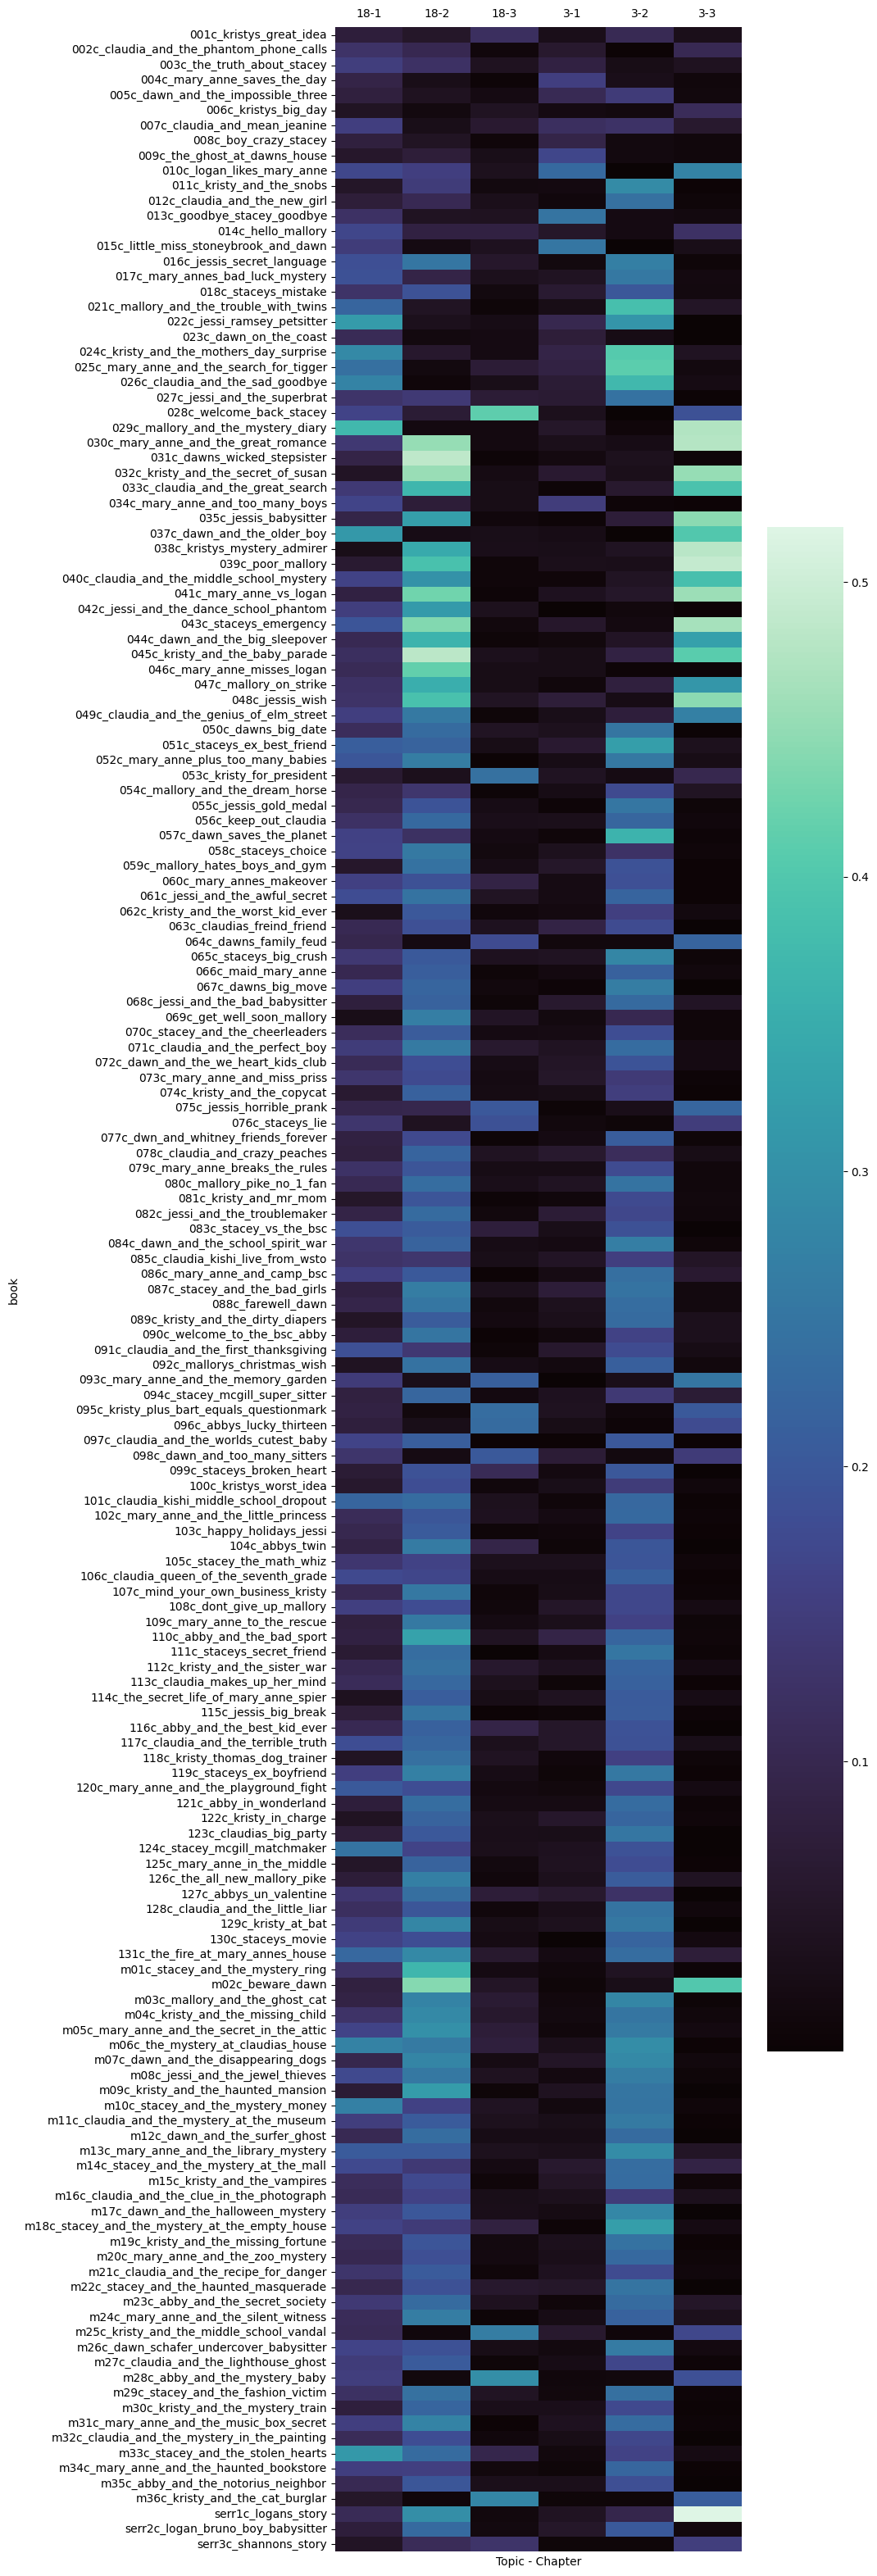

In [ ]:
ch_2_topics = [3, 18]
ch_2_topic_df = doctopics_df.query('chapter < 4')[
                    ['segment_name', 'book', 'narrator', 'chapter'] + [str(k) for k in ch_2_topics]
                ].rename({str(k): 'proportion'}).pivot_table(index='book', columns='chapter', values=[str(k) for k in ch_2_topics], aggfunc='mean')

# Plotting chapters 1, 2, and 3 across books for hypothesized "chapter 2" topics
plt.figure(figsize=(8,40))
seaborn.heatmap(ch_2_topic_df, cmap='mako')
plt.xlabel("Topic - Chapter")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False,
                bottom=False, top = False, labeltop=True)

Our hypothesis holds for most books on the list: both topic 3 and topic 18 are lit up in Chapter 2. We also see a couple of additional things: first, unsurprisingly, our describing-people topic (18) is also showing up in Chapter 1 pretty consistently, though usually in a less concentrated way. Since some characters are getting introduced in Chapter 1 usually, this makes sense - and it also makes sense the meeting topic wouldn’t match on that, so we see topic 3 is not usually lit up.

But the fun part here is the exceptions. If we scroll to the top of this plot, we see a lot more variation! It looks like our crisp meeting logistics topic, topic 3, isn’t really lighting up all that much for the first chapters of the first eight books at all, then starts to show up in different patterns in any of the first three chapters. It isn’t until 16-27 that we get a pretty consistent run of chapter 2 having a lot of topic 3 (with a break for Dawn on the Coast, where even Kristy admits “It’s not exactly a meeting” when they have a party in Chapter 2). During this time, Topic 18 is showing up more consistently in Chapter 1 than Chapter 2. Then, we see a run with some of the most prominent signs of topic 3…all in Chapter 3! It looks like during this period (roughly books 29-49, though there are definitely exceptions in there), a pattern emerges of describing the babysitters in Chapter 2, then walking through their meeting in Chapter 3.

Starting in Book 50, we seem to settle into merging those two chapters into one, marking the signature "Chapter 2" format. From here on, both topics seem to appear dominantly in the same early chapter, usually landing in Chapter 2 but occasionally Chapter 3. The only exceptions to these two topics “traveling together” seem to be a couple of early mysteries and the Special Edition: Reader’s Request books, which are not surprising to see breaking form.

Now, of course, the topic analysis is unlikely to tell the whole story here; it’s probably the case that meetings and descriptions were happening in some of these chapters, but the language might have been varying a little over time compared with the consistency of the latter books. All the same, this was a surprise to confirm for me as I skimmed book chapters: it does indeed look like the merged chapter 2 I was used to taking for granted actually used to be two separate components, and that our topics can help us track how those components got moved around and interwoven into the modern format.

### Once more, with 50 topics

I wrote the code to make my plots carefully: I tried to make sure I never referred to the number “20” directly, and instead always used the variable ntopics to describe how I wanted things plotted. This relates to the programming practice of “avoiding magic numbers”: if you have an exact constant like a 20 or 50 in your code all over the place, it’s really hard to update, but if there’s a variable at the top that you define and reuse, it’s much easier. This means I can pretty much just replace the number 20 with 50 and immediately regenerate the plots I want – the only thing I’m going to need to do is update the aspect ratio.

I’m going to skip straight to our topic-narrator plot first, which we generate the same way we did for the 20-topic model. Before, we were sometimes conflating two babysitters in one topic. Have we successfully separated out topics for each of our babysitters while also having topics in common?

We could rewrite all the code above - or we can just rerun it by setting `ntopics = 50` way earlier in our code! Here's the plot we get for our new babysitterby-topic analysis:



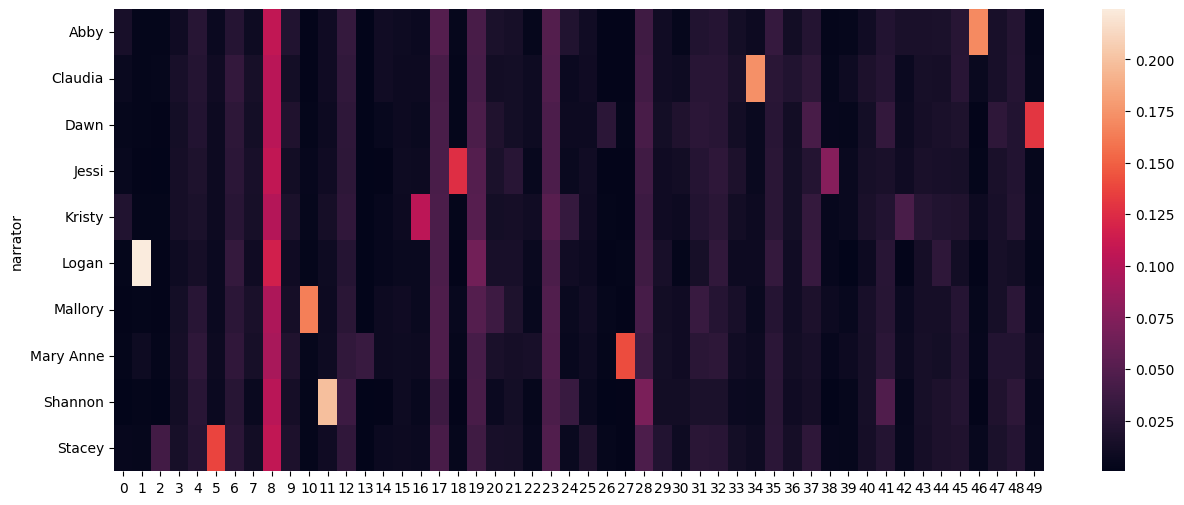

In [ ]:
from IPython.display import Image
Image(data_path + "50_topic_by_narrator.png")


Looks like it! We used to have Kristy and Shannon sharing a topic, but now, Kristy has topic 16 (and to a lesser extent topic 42), while Shannon alone dominates topic 11. Indeed, we seem to have a baby-sitter-aligned topic for each babysitter now, with some even having two more or less exclusively to themselves – in addition to Kristy’s pair of topics, Jessi has 18 and 38. While Quinn pointed out the babysitters sharing topics might have been a feature, not a bug, this number of topics gives us a way to separate pieces out a bit more if we prefer that kind of analysis.

Last time, we spotted a Kristy topic that seemed to be about Kristy’s family. Can we find a topic like that again? 16 and 42 look like good candidates in this new model from the top words and topic proportions, but 43 also sticks out as very Kristy-ish, even though it's not specific to her books:

| Topic # | Alpha  | Keywords|
|----|---------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
                       |
| <font color="cyan">16  | <font color="cyan">0.07065 | <font color="cyan">	kristy charlie bart asked told watson couldn't knew thought didn't looked cary susan replied friends thinking wasn't shannon heard sam guess felt felder started realized thomas cokie tonya wanted hadn't agreed bea karen dilys nodded idea sarah suddenly watch running began angelica stop laughed abbott sounded jake wondered hoping yelled   |
| <font color="cyan">42 | <font color="cyan">0.0846  | <font color="cyan">kristy karen david michael andrew emily hannie linny lou watson nannie shannon asked sam michelle louie charlie papadakis kids karen's told cried scout mom sari mrs porter kristy's puppy house boo-boo michael's replied nancy brother dru game watson's papadakises called dog yard emma witch playing luke added began moment andrew's    |
| <font color="cyan">43	 | <font color="cyan">0.02024	| <font color="cyan"> kristy kristy's watson mom family david michael live house emily brothers karen brewer mansion sam thomas kids andrew moved charlie michelle nannie mrs she's older mother brother named watson's married grandmother adopted younger who's lives it's dog town millionaire big girl he's sister puppy stepsister marriage stepfather father care ago  |



And this is where it gets to the heart of why you may (or may not) want more topics in your topic model: if we look at the top few documents for these topics, we can find out there's actually a distinction between these topics besides the order of names:

#### Topic 16

**095c_kristy_plus_bart_equals_questionmark_14.txt-18 - Kristy, Chapter 14 (71.64%)** Bart was about to pedal away but he didn’t. “Huh?” “You know, the April Fools’ Day Dance?” I reminded him. “At your school? Did you forget?” “Well, no,” Bart replied. “But we’re not going to that dance together.” “I thought — didn’t you ask — we’re friends again, aren’t we?” “Sure we are. But this is a dance, Kristy. I don’t want to take just a friend to the dance.”

**122c_kristy_in_charge_10.txt-9 - Kristy, Chapter 10 (67.72%)** "How do teachers manage, then?" I asked. "You have to give a little," Ms. Walden said. "Things can't always go exactly as you think they should. You have to allow other people to have input." "Cary has no input," I pointed out. "His idea of student teaching is to let the kids run wild!" "And what's your idea of how it should be?" she asked. "Well ..." Here was my chance to tell her how I thought she might improve her own teaching. "Kids should learn, but in a fun way. You don't have to yell at them and punish them all the time."

**038c_kristys_mystery_admirer_12.txt-14 - Kristy, Chapter 12 (63.97%)** Well, she certainly wasn’t my best friend. “Anyway,” Cokie went on, “I thought you might need a little extra cheering. You’ve looked sort of depressed lately. I want your team to win.” “I haven’t been depressed!” I cried. “I’ve even got a boyfriend. He’s coming to the Halloween Hop with me.” “Really?” said Cokie. “You must like each other a lot.” I drew myself up. I knew I was showing off, but I couldn’t help saying, “We plan to spend our lives together.”

**045c_kristy_and_the_baby_parade_8.txt-1 - Kristy, Chapter 8 (63.14%)** I looked around the room at my friends. Nobody had begged me to tell them my idea, but then again, none of them had said I shouldn’t. “Okay, here’s what we’ll do. The theme will be — get this — Take Me Out to the Ball Game!” I scanned their faces to see their reactions to my idea, but I couldn’t tell what they thought. “We’ll dress the babies in little baseball uniforms and decorate the float like a baseball diamond. It’ll be so, so cute!” I went on.

#### Topic 42
**039c_poor_mallory_10.txt-2 - Mallory, Chapter 10 (84.96%)** “Let’s play with Myrtle the turtle and Noodle the poodle,” said David Michael. “Nah. We already did that today,” Linny told him. “Dolls!” Karen suggested to Hannie. “Nah,” said Hannie. “Invaders from the planet Neptune?” Linny suggested to David Michael. “Nah,” said David Michael. “Hey!” cried Karen. “I know something we’ve never played, and we can all play it together. Even Sari. Even you, Kristy.”

**009c_the_ghost_at_dawns_house_7.txt-11 - Dawn, Chapter 7 (78.85%)** "Except for the storm," said Andrew. "And the fire crackling," added David Michael. "And just think," said Karen. "This was happening right here in our house ... in that room on the third floor." (Ben Brewer is Andrew and Karen's great-grandfather.) "The room we never go in," whispered Andrew. At that moment, Boo-Boo, the Brewers' fat cat, waddled in. Karen pointed to him. "Boo-Boo knows about that room, Kristy. He knows it's haunted."

**062c_kristy_and_the_worst_kid_ever_3.txt-19 - Kristy, Chapter 3 (74.19%)** “He’s coming. He’s coming!” “Who?” said David Michael. “The foster kid. This afternoon!” “You’re getting a brother?” asked David Michael. That stopped Linny, but only for a moment. “We’re not sure yet. But I bet we are. The people called today and said it would be this afternoon.” “That’s great news, Linny,” I said. “Can we come over?” asked David Michael.

**062c_kristy_and_the_worst_kid_ever_9.txt-13 - Kristy, Chapter 9 (71.32%)** “You are going to meet a tall, dark stranger?” “I’m not …” “You might,” said Karen. “I’m going on a treasure hunt,” I told her. “Can I come, too?” “Me too, me too,” cried David Michael. “And me,” said Andrew. “Me,” echoed Emily Michelle. “In the attic,” I said. “Right after breakfast. For stuff for the auction.” (I’d already told everyone about the auction.)

#### Topic 43

**045c_kristy_and_the_baby_parade_1.txt-3 - Kristy, Chapter 1 (94.51%)** And then, not too long ago, my mom met this really terrific guy named Watson Brewer. They fell in love and got married — so now Watson’s my stepfather. After the wedding, we moved across town to live in his mansion. Watson is a real, true millionaire. Can you believe it? But you’d never know it by the way he acts — he’s not stuck up or anything. He’s just a regular guy. And he’s a great father to his two kids from his first marriage — Karen (she’s seven) and Andrew (he’s almost five). They live with us every other weekend and for a couple of weeks during the summer. They’re terrific kids.

**m11c_claudia_and_the_mystery_at_the_museum_2.txt-4 - Claudia, Chapter 2 (94.24%)** But Kristy's family has changed — and grown — a lot in the last year or so. It all started when Kristy's mom fell in love with a man named Watson Brewer, who happens to be mega-rich. When they got married, Kristy and her brothers moved across town to live in Watson's mansion. (They used to live across the street from me.) Watson has two children from his first marriage, Karen and Andrew, who live with him part-time. And soon after their marriage, Watson and Kristy's mom decided to adopt a baby, so Emily Michelle came to live with them, too. She's an incredibly cute two-and-a-half-year-old Vietnamese girl. Soon after she arrived, Kristy's grandmother (everybody calls her Nannie) moved in to help out with everything. Full house, right? And that's not even counting the pets — Shannon, Boo-Boo the cat, and the goldfish.

**119c_staceys_ex_boyfriend_2.txt-9 - Stacey, Chapter 2 (93.35%)** She's also very down-to-earth. You'd never guess she lives in a mansion and that her stepfather is a millionaire. It's true, though. Kristy's birth father walked out on the family not long after Kristy's younger brother, David Michael, was born. He just up and left Kristy's mom to support four kids on her own. (Kristy also has two older brothers, Sam and Charlie.) It was really tough for them for a while, but Kristy's mom was tough too. She supported all of them on her own. Then she met and married Watson.

**085c_claudia_kishi_live_from_wsto_2.txt-5 - Claudia, Chapter 2 (93.25%)** Times were tough for Kristy’s family back then. Mrs. Thomas was raising four kids by herself — Charlie (who’s now seventeen), Sam (fifteen), and David Michael (seven and a half). Kristy’s dad had walked out on his family not long after David Michael was born, just left them flat, no explanations, no nothing. Can you imagine? Boy, have things changed. Mrs. Thomas married this nice, quiet guy named Watson Brewer, who is a millionaire. Now Kristy and her family live in a real mansion on the wealthy side of town, along with an adopted little sister, Emily Michelle, who’s from Vietnam; Nannie, Kristy’s grandmother; Watson’s two kids from his previous marriage (seven-year-old Karen and four-year-old Andrew, who are there every other month); and several pets.

---

Does it make sense what might be distinctive here? Again, it might take more sleuthing to be sure, but it looks like our classic "introduce Kristy's blended family" introduction now has topic 43 all to itself, whether it's Kristy narrating or someone else. In contrast, the other two topics both center dialogue, but where topic 16 seems to highlight a few specific Kristy-perspective conversations, topic 42 seems to highlight conversations with Kristy's siblings.

I think it's fair to say that if we wanted to analyze Kristy's narrative, this would be cool to dig into more; for other questions that are more cross-babysitter, however, this level of splitting might be frustrating. One approach to this is just to use fewer topics; another is to train with more topics than you need and then to manually combine the ones you think should be treated the same for your question of interest. Because topics are just proportions and probabilities, if we want to combine two topics, we can literally just add them together, which makes it pretty easy to analyze. However, I usually prefer to just train a few models at the outside - 10, 20, 50, 100 topics, say - to see which one feels right for the questions I have, and to work from there. It might seem excessive, but why limit myself? Changing my mind is usually as easy as changing one number at the top of a file, just like here.

## Quinn

### Where's the walking disaster?

So far the only walking disaster we've found in this book has been me, in Las Vegas in 2019, not knowing what I was doing with topic modeling and getting frustrated at how little I could get out of them. But there's another way that topic modeling can be like Jackie Rodowsky, the infamously klutzy baby-sitting charge: much like Jackie, if your corpus is "dirty", topic modeling will find the mess and trip over it. Even if you don't want to use it for its analytical capabilities with document chunks like we've done here, consider trying topic modeling when you're working with a corpus that you *don't* know inside and out, and where you suspect there might be some "mess".


One of my projects at work involves analyzing the last 20 years of dissertations from my department. (Fellow Data-Sitter Katia and I have also mulled over doing something similar for the last 20 years of Slavic dissertations in the US and Canada!) One of the tricky things about this project is that not all the texts are in English -- but I don't know which ones aren't. What's worse, there are plenty of dissertations that are *mostly* in English, except for where they aren't. I'm excited about the possibilities of using topic modeling to help me sift through these dissertations to find the parts that are the acknowledgements, the parts that are the citations, and the parts that are extensive quotes from primary sources in other languages, to help me find the main English substantive parts of the dissertations, so I can compare them across time, advisors, and topics to better understand the kind of scholarship the department produces.

### Topic modeling ftw!

Working with Xanda and Sathvika changed my mind about topic modeling: it's gotten a big boost in my personal DH text analysis toolkit. I can see using it at the beginning of the project, when I'm working with a messier corpus than the Data-Sitters Club (and *almost all* the corpora are messier than the DSC at this point, after we've worked with it for four years). I can see using it to explore different ... well, *topics* in a corpus after I've cleaned it up. And for corpora that I know well, I can see using it as another lens on quantifying and solidifying my understanding of things that I have hunches about, like the infamous "chapter 2" phenomenon in the Baby-Sitters Club. There's more we could even do with the topic models Xanda and Sathvika made here, reading through the book synopses in [the Ann M. Martin archive](https://datasittersclub.github.io/site/dsc17.html), and then using it as a starting point for diving into how those topics play out in the corpus.

Topic modeling reliably trips over mess in your corpus, and it chokes if you give it too much text, but much like klutzy Jackie Rodowsky, I can definitely imagine it becoming a beloved member of an ensemble cast of DH tools, as long as you understand what you're getting into.